### Competition Title: Return Forecasting Competition 3

#### Final Submission Deadline:  

You will have until 23:59 UTC on April 30 to submit your entries. You may submit up to 5 entries

#### Prize

Subject to the Contest Rules, the winner of this competition will receive a cash prize of $5000 USD, paid either by stablecoins or bank transfer.

#### Objective
Participants are challenged to develop a predictive signal that forecasts the returns of a set of assets. The goal is to create a signal $P(i)$ at each timestamp $i$ that effectively predicts the next returns over a forward period which is k steps away. The objective is to minimize a loss function $U$.

#### Background
Financial markets are known for their nonstationarity and complex dynamics. The assets here, which will remain masked,  enable leveraged trading without an expiry date, are particularly popular and offer unique opportunities for systematic trading. This challenge tests participants’ ability to forecast returns that are not only accurate but also consistent over time.

#### Competition Data

The Competition Data consists of:
a) Three historical datasets containing historical returns, historical target returns and associated features.
b) A prototype Jupyter notebook that provides an example implementation.


Within the notebook, you will find a Predictor class. Your submission must strictly adhere to the interface of this class. While you are allowed to add new methods, you cannot modify or remove any existing method names.  

Additionally, you must partition the historical data into training and validation sets using the exact method specified in the notebook. Please note that a hidden testing set will be used for final evaluation. This dataset will remain undisclosed to all participants until a designated date after the Final Submission Deadline.

#### Historical Data Description
- **Input Data:** A time series of returns from assets, $X(i) = (X_1(i), X_2(i), ..., X_J(i))$, where $i$ denotes the time index expressed as an integer, and each $X_j(i)$ represents the one step return of the $j$-th asset at time $i$.
- **Target Data:** A time series of returns from assets, $T(i) = (T_1(i), T_2(i), ..., T_J(i))$, where $i$ denotes the time index expressed as an integer, and each $T_j(i)$ represents the k-step forward return of the $j$-th asset at time $i$.
- **Prediction Target:** At each time $i$, participants will predict a vector signal $P(i) = (P_1(i), P_2(i), ..., P_J(i))$, where each $P_j(i)$ represents the participant’s prediction for the return the $j$-th asset over some fixed forward time k.


   > **Note:** The actual values of the returns and target returns,$X(i)$ and $T(i)$, are obfuscated to maintain data confidentiality, and participants will work with pre-processed, relative return values that do not reveal underlying raw prices.

- **Feature Data:** In addition to historical return data, participants will have access to a set of obfuscated features. Each timestamp $i$ is associated with a feature vector $F(i) = (F_1(i), F_2(i), ..., F_K(i))$, where $K$ is the number of available features, and each feature is identified only by its index (e.g., $F_1, F_2, \dots, F_K$).

#### Loss Function
The performance of each submission will be evaluated using the following loss function:
##### Mean Squared Error (MSE) for Vector Predictions

Assume that for each time step \(i\), the prediction \(P(i)\) and the target \(R(i+1)\) are vectors in of dimension J. If there are \(N\) time steps, the MSE is defined as:

$$
\text{MSE} = \frac{1}{N \cdot J} \sum_{i=1}^{N} \sum_{j=1}^{J} \left( P_j(i) - T_j(i) \right)^2
$$

where:
- N is the total number of time steps,
- J is the dimensionality of the prediction/target vectors,
- $P_j(i)$ is the \(j\)-th element of the prediction vector at time i.
- $T_j(i)$ is the \(j\)-th element of the target vector at time i.


#### Scoring Criteria

Forecasts generated by models that AlphaNova determines to be overfit will be disqualified. Overfitting occurs when a model performs well on historical data but fails to generalize to new data. You can learn more about this issue in the literature, such as The Deflated Sharpe Ratio: Correcting for Selection Bias, Backtest Overfitting, and Non-Normality by De Prado and Bailey. We encourage you to conduct your own overfitting tests before submitting your model.

AlphaNova will automatically test each submission for overfitting using a Monte Carlo simulation. This approach evaluates the model’s training method by applying it to randomly generated data samples. The key metric is the 5% quantile Loss Function, which represents the lowest Loss Function value obtained in 5% of these random samples.

If a model’s actual Loss Function value is higher than this threshold, we cannot be confident that the model is not simply fitting historical data. As a result, the model will be disqualified.

Participants submissions that aren't deemed to be overfit will be ranked based on their loss function $U$.

#### Submission Format
Your submission should be either:

A copy of our template notebook, OR
A .py file containing the same content as the template, except for your custom Predictor implementation.

##### Naming Your Submission
Feel free to name your notebook or .py file as you wish:
name.ipynb (for notebooks)
name.py (for Python scripts)

##### Implementing Your Predictor
Extend the Predictor class in the template with your own implementation.
Your Predictor class should include:

###### 1. Parameter creation if needed
###### 2. Training logic
###### 3. Prediction logic

Each of these elements should be clearly defined within the class methods.

##### Submission
Once your submission is complete, upload solution file at the competition page on www.alphanova.tech.

The output of your prediction, as per the example below should be a dataframe with the following information:  For each time $i$, participants must submit a vector $P(i) = (P_1(i), P_2(i), ..., P_J(i))$ that represents their forecast for the next k-forward time step’s returns across all assets in the dataset.

#### Computation Rules and Guidlines
- **NO GPU**:  AlphaNova at this time will not accept models that effectively require GPU for training. This may change in the future. 
- **Training Time**: No specific rules for this, but keep in mind that the dataset is small and hence we'd expect that it shouldn't take longer than several seconds to train the model on a reasonable instance.
- **Forecast Time**: It should not take longer than than a handful of seconds to make one forecast for one time stamp. In future contests we will be more precise about these requirements. 

#### Winning Criteria
The participant whose submission is not overfit and with the lowest loss $U$ over the Test Set will be declared the winner. In the event that multiple users by chance have the same winning utility, we will reward the full prize to the contestant who submitted his/her solution *first*.

#### Test Set
The evaluation will be conducted over a hidden test set, e.g. that we hold but you do not have, during which $ U $ will be calculated based on the predictions submitted by participants.  

#### Additional Notes
- **Data Confidentiality**: Both target returns and feature data are obfuscated. Features are labeled only by an index, and timestamps are represented as sequential integers.

#### Important Note for the avoidance of doubt
The only things you need to change in your version of this notebook are a) possible additional imports of modules and b) replace the example Prediction class with its own parameters, train and predict methods.  Don't edit anything else.

#### Backtests in the sample notebook. 

There are backtests in the sample notebook. Don't pay too much attention to that, since the forecasts are over a longer horizon than one time step.  The main thing to pay attention to is the MSE calculations.  Again, we will evaluate forecasts based on the MSE in the hidden set.

# Example of forecast

In [31]:
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression


import numpy as np


import matplotlib.pyplot as plt


from itertools import product

In [32]:
pd.set_option("display.float_format", "{:.6f}".format)

## read in data

In [33]:
returns = pd.read_parquet("data/returns.contest.24.02.25.parquet")
features = pd.read_parquet("data/features.contest.24.02.25.parquet")
target_returns = pd.read_parquet("data/target_returns.contest.24.02.25.parquet")

#### Takeaways
* Forecasting strategies produce out-of-sample gains largely by accommodating model uncertainty and parameter instability
* Abnormal returns can be influenced by a myriad of factors, including firms’ idiosyncratic characteristics, market efficiencies, macroeconomic conditions, financial market dynamics, and investor sentiment

## Returns

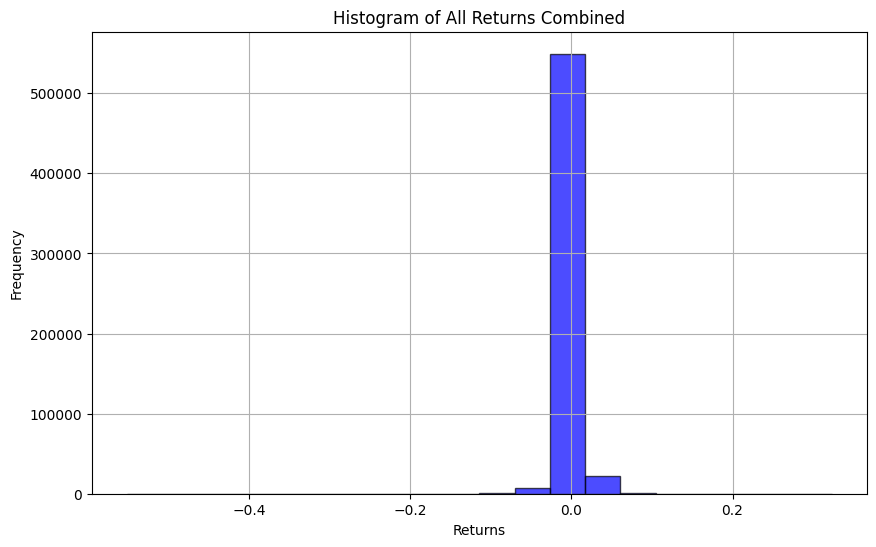

In [34]:
# Flatten all return values into a single array
all_returns = returns.values.flatten()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(all_returns, bins=20, alpha=0.7, color="blue", edgecolor="black")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title("Histogram of All Returns Combined")
plt.grid(True)

plt.show()

#### Data analysis  - All returns

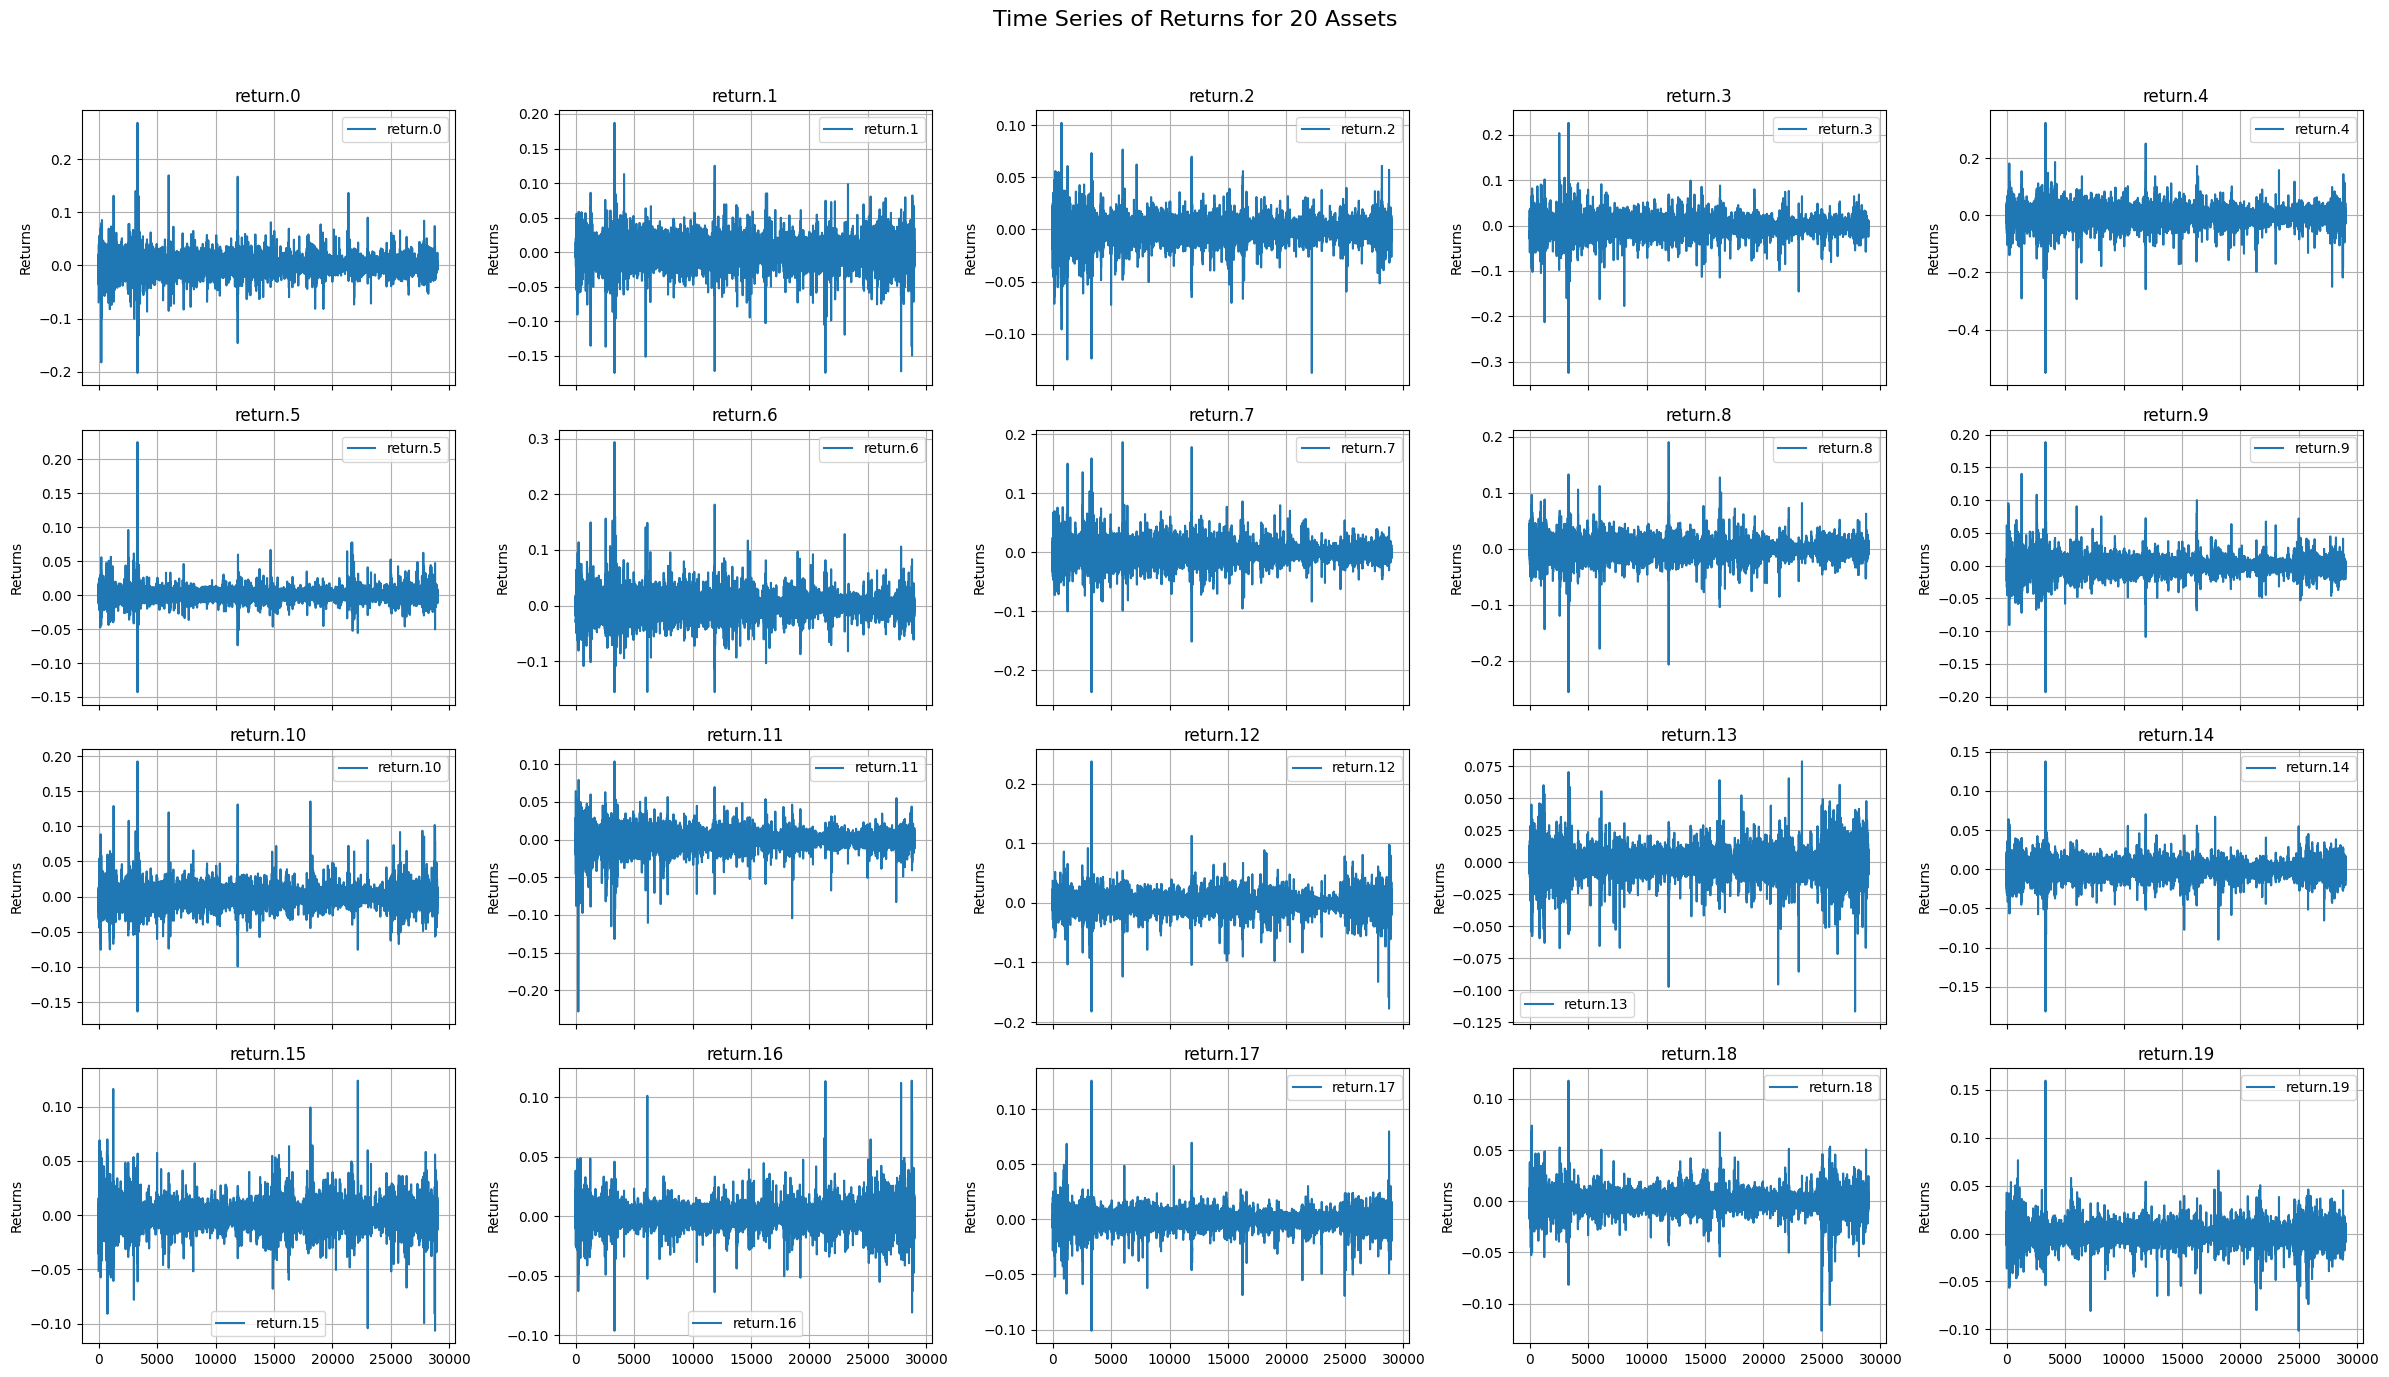

In [35]:
def all_plots(df, rows, cols):

    fig, axes = plt.subplots(rows, cols, figsize=(24, 14), sharex=True)
    fig.suptitle("Time Series of Returns for 20 Assets", fontsize=16)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Loop through the first `rows * cols` return columns
    for i, col in enumerate(df.columns[: rows * cols]):
        axes[i].plot(df.index, df[col], label=col)
        axes[i].set_title(col)
        # axes[i].set_xlabel("")
        axes[i].set_ylabel("Returns")
        axes[i].grid(True)
        axes[i].legend()

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Prevents title overlap
    plt.show()


all_plots(returns, rows=4, cols=5)  # You can modify rows and cols if needed

## Compute risk metrics

### To better vizualize and imporve algorithins predictions, multiply return by 100

In [36]:
returns_2 = returns * 100
returns_2

,return.0,return.1,return.2,return.3,return.4,return.5,return.6,return.7,return.8,return.9,return.10,return.11,return.12,return.13,return.14,return.15,return.16,return.17,return.18,return.19
0,-6.939050,1.345075,1.211910,-5.676853,1.653055,0.730497,-2.626027,-3.955185,4.950900,-3.185697,-2.145797,-0.684673,3.703369,0.256842,-2.048534,-5.121108,-2.444391,1.394147,0.165237,2.260721
1,-1.876520,0.732377,-1.898505,0.220935,1.509292,-0.105644,-0.497231,-1.334784,1.751333,0.919825,-0.716604,0.179067,0.151443,-0.133947,-0.311452,-0.682341,-0.974932,0.126484,-0.262929,0.495103
2,1.127755,1.282375,-0.453607,3.404193,3.768620,-0.393354,-3.030202,2.498857,0.326890,0.764779,-0.413324,-0.723696,0.007551,1.308464,2.225610,1.569622,3.821269,1.170825,0.686849,0.936988
3,0.118527,-0.173082,0.725937,2.104833,2.267000,-0.297178,0.328512,1.211988,0.563263,0.084770,0.195500,-0.739649,-0.642839,0.388115,0.700200,0.566383,-0.029950,0.235810,0.025978,-1.059651
4,-1.646054,0.017415,-1.320452,-0.999936,0.491822,0.164246,0.366818,-2.349798,0.999347,-0.462081,-0.135500,-2.027017,-0.276217,0.717613,-1.188104,0.443885,-0.650791,0.224389,0.254684,-1.151616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,0.776177,-1.379451,0.430018,-0.476657,-1.439976,0.487009,0.634891,0.216917,-0.103894,0.222888,0.576753,0.169448,-0.959230,-0.687803,-0.276068,-0.715511,1.065222,0.033338,0.735522,-0.358261
28996,-0.158769,-1.330032,0.621936,0.275616,-0.730135,0.146294,0.932630,-0.781403,-0.507233,-0.207240,1.013396,0.724019,-1.303454,0.179721,-0.276488,-1.274090,1.353606,1.432222,-0.534170,-0.183599
28997,0.290495,-0.756465,0.200084,0.227398,-0.281076,-0.336624,0.696542,-0.109977,-0.061673,-0.454025,1.022839,0.035465,-0.564782,-0.586505,0.394662,-0.527011,0.415516,0.716454,-0.121108,0.347254
28998,-0.461032,0.585493,-0.419029,0.663882,2.051861,-0.302889,-0.960193,-0.169689,0.548745,-0.313704,-0.959882,-0.224346,1.325613,-0.066548,0.508802,0.503928,-0.905089,-0.251925,-0.482661,0.283521


### Compute first-order auto-correlation 

In [37]:
# Compute first-order autocorrelation for each returns column
autocorrelations = returns_2.apply(lambda x: x.autocorr(lag=1))

# Display the autocorrelations
print(autocorrelations)

return.0    -0.002555
return.1    -0.000680
return.2    -0.020608
return.3    -0.004801
return.4    -0.006674
return.5    -0.022850
return.6     0.007820
return.7    -0.025533
return.8    -0.019778
return.9    -0.027064
return.10   -0.019582
return.11   -0.004823
return.12   -0.042157
return.13   -0.021960
return.14   -0.015344
return.15   -0.031255
return.16   -0.032367
return.17   -0.043272
return.18   -0.011205
return.19   -0.017285
dtype: float64


#### First-order autocorrelations are very close to zero (mostly between -0.05 and 0.01):
* it suggests that past returns do not have a strong influence on future returns. 
* This weak autocorrelation implies that time-series-based trading strategies, such as moving averages, momentum trading, or ARIMA-based models, may not be effective because there is little to no persistence in returns over time.

### Compute risk metrics (variance risk premium)

* Motivation for this approach:
  * Comes from the mean reversion and extreme value theory, which are popular for risk and asset management applications. 
  * **Mean reversion:** 
    * Common financial time series pattern
    * Statistical tendency in a time series to gravitate back toward a long-term historical level.
  *  **Extreme value theory (VaR / ES):**
     * theory concentrates on the tail behavior of fat-tailed distributions, mainly used for risk measurement 
     * Mar measured by the distance away from the historical average


### Generate risk interval groups

In [38]:
def compute_risk_measurement(df):
    """
    Function that extracts risk measure:
    Risk_distance = Current Return - Average Return
    """
    # Compute historical mean and standard deviation for each asset
    mean_returns = df.mean()
    std_returns = df.std()

    # Compute risk interval (distance from mean)
    risk_distance = df - mean_returns

    # Rename columns from return.x to risk_dist.x
    risk_distance.columns = [
        col.replace("return", "risk_dist") for col in risk_distance.columns
    ]

    # Concatenate the risk metrics with the original dataframe
    df = pd.concat([df, risk_distance], axis=1)

    # Define risk classification (low, medium, high, very high)
    risk_levels = pd.DataFrame(index=df.index)

    for col in risk_distance.columns:
        risk_interval_1 = 0.5 * std_returns[col.replace("risk_dist", "return")]
        risk_interval_2 = 1.5 * std_returns[col.replace("risk_dist", "return")]
        risk_interval_3 = 2.5 * std_returns[col.replace("risk_dist", "return")]

        risk_levels[col.replace("risk_dist", "risk_level")] = np.select(
            [
                abs(risk_distance[col]) < risk_interval_1,  # Too comom
                (abs(risk_distance[col]) >= risk_interval_1)
                & (abs(risk_distance[col]) < risk_interval_2),  # Mommentun effect
                (abs(risk_distance[col]) >= risk_interval_2)
                & (abs(risk_distance[col]) < risk_interval_3),  # High Risk
                abs(risk_distance[col])
                >= risk_interval_3,  # Amost zero probability of occurence
            ],
            ["1", "2", "3", "4"],  # Correctly aligned with conditions
            default="Unknown",
        )

    # Concatenate risk levels with the original dataframe
    df = pd.concat([df, risk_levels], axis=1)

    return df, risk_distance, risk_levels


# Compute the risk interval and classification
df, risk_distance, risk_levels = compute_risk_measurement(returns_2)

df.columns

Index(['return.0', 'return.1', 'return.2', 'return.3', 'return.4', 'return.5',
       'return.6', 'return.7', 'return.8', 'return.9', 'return.10',
       'return.11', 'return.12', 'return.13', 'return.14', 'return.15',
       'return.16', 'return.17', 'return.18', 'return.19', 'risk_dist.0',
       'risk_dist.1', 'risk_dist.2', 'risk_dist.3', 'risk_dist.4',
       'risk_dist.5', 'risk_dist.6', 'risk_dist.7', 'risk_dist.8',
       'risk_dist.9', 'risk_dist.10', 'risk_dist.11', 'risk_dist.12',
       'risk_dist.13', 'risk_dist.14', 'risk_dist.15', 'risk_dist.16',
       'risk_dist.17', 'risk_dist.18', 'risk_dist.19', 'risk_level.0',
       'risk_level.1', 'risk_level.2', 'risk_level.3', 'risk_level.4',
       'risk_level.5', 'risk_level.6', 'risk_level.7', 'risk_level.8',
       'risk_level.9', 'risk_level.10', 'risk_level.11', 'risk_level.12',
       'risk_level.13', 'risk_level.14', 'risk_level.15', 'risk_level.16',
       'risk_level.17', 'risk_level.18', 'risk_level.19'],
      dtype

In [39]:
def compute_risk_level_percentages(risk_levels):
    """
    Computes the percentage of each risk level (Low, Medium, High) per column.
    """
    # Count occurrences of each category (Low, Medium, High)
    risk_counts = risk_levels.apply(lambda col: col.value_counts(normalize=True) * 100)

    # Fill NaNs with 0 in case some risk levels are missing for a column
    risk_counts = risk_counts.fillna(0)

    return risk_counts


# Compute percentage distribution
risk_level_percentages = compute_risk_level_percentages(risk_levels)

risk_level_percentages

,risk_level.0,risk_level.1,risk_level.2,risk_level.3,risk_level.4,risk_level.5,risk_level.6,risk_level.7,risk_level.8,risk_level.9,risk_level.10,risk_level.11,risk_level.12,risk_level.13,risk_level.14,risk_level.15,risk_level.16,risk_level.17,risk_level.18,risk_level.19
1,57.289655,53.320690,56.837931,60.386207,57.731034,57.075862,59.444828,57.479310,56.365517,57.941379,54.237931,56.996552,55.582759,55.600000,52.579310,55.520690,54.503448,55.434483,56.006897,54.172414
2,33.286207,36.727586,34.306897,30.534483,33.079310,34.351724,31.131034,32.775862,34.262069,33.189655,35.858621,33.996552,35.068966,35.082759,37.513793,35.241379,35.958621,35.644828,35.072414,36.382759
3,6.531034,7.051724,6.110345,6.086207,6.237931,5.958621,6.303448,6.865517,6.665517,6.044828,7.231034,6.189655,6.572414,6.400000,7.227586,6.448276,6.820690,6.286207,6.200000,6.817241
4,2.893103,2.900000,2.744828,2.993103,2.951724,2.613793,3.120690,2.879310,2.706897,2.824138,2.672414,2.817241,2.775862,2.917241,2.679310,2.789655,2.717241,2.634483,2.720690,2.627586


### features

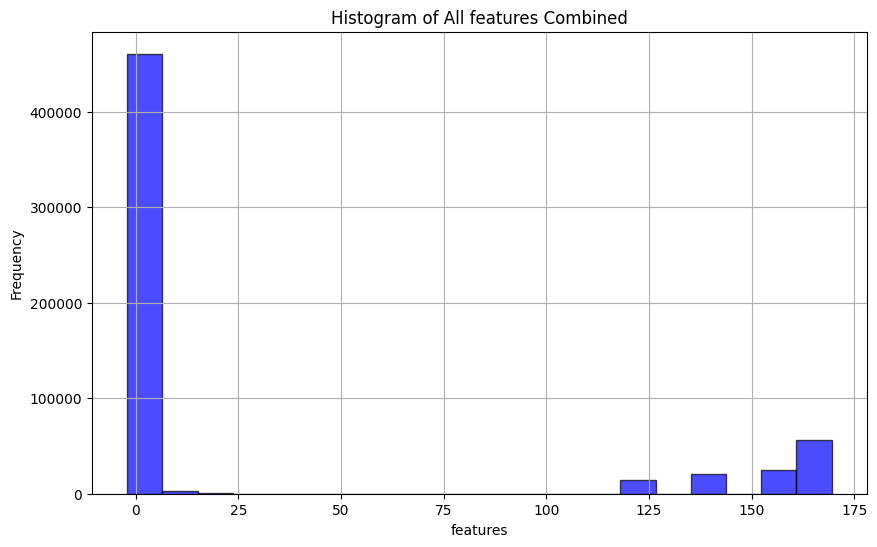

In [40]:
# Flatten all return values into a single array
all_features = features.values.flatten()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(all_features, bins=20, alpha=0.7, color="blue", edgecolor="black")
plt.xlabel("features")
plt.ylabel("Frequency")
plt.title("Histogram of All features Combined")
plt.grid(True)

plt.show()

### Compute correlation matrix accross all features and risk_distance

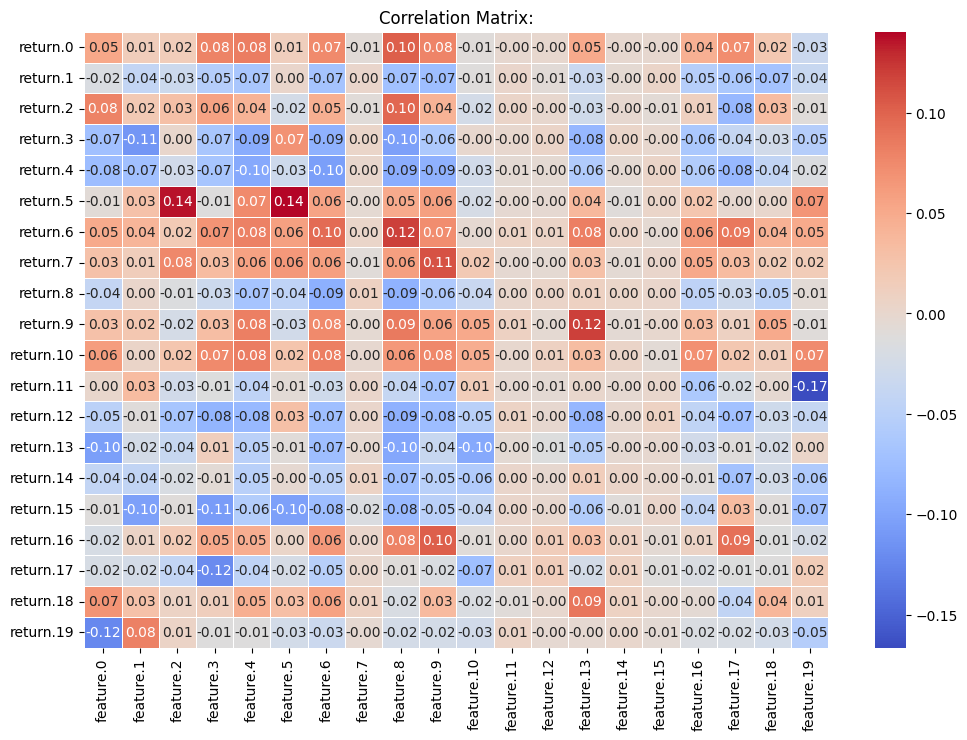

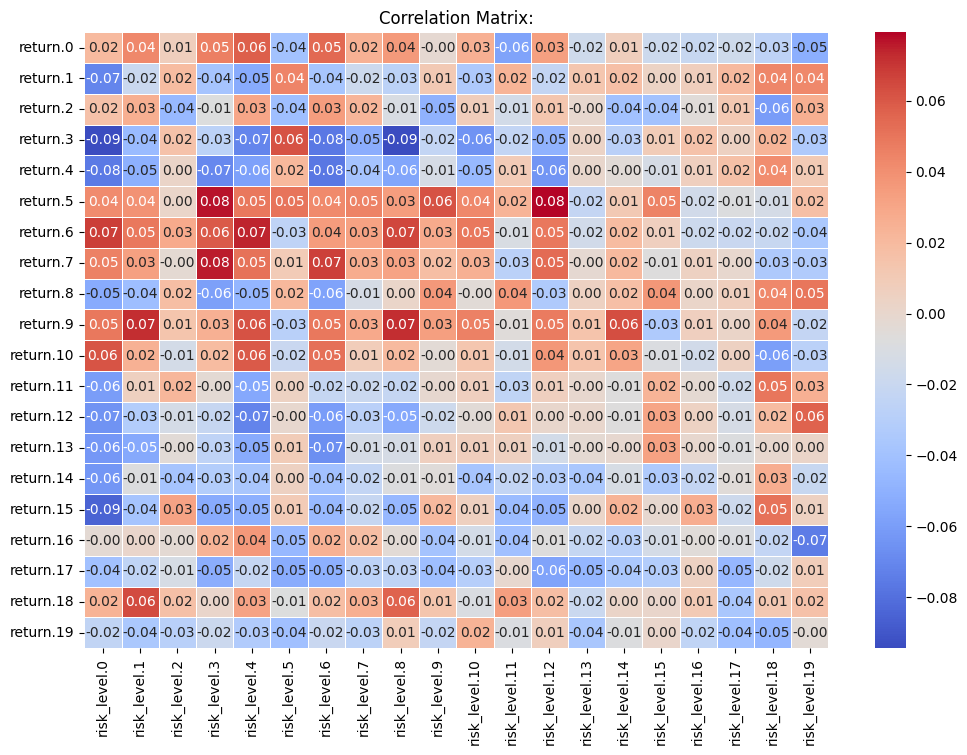

In [41]:
def compute_correlation_matrix(df_1, df_2):

    # Merge returns and features into a single DataFrame
    combined_df = df_1.join(df_2)

    # Compute correlation matrix only between returns and features
    correlation_matrix = combined_df.corr().loc[df_1.columns, df_2.columns]

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
    )
    plt.title("Correlation Matrix:")
    plt.show()

    return correlation_matrix


# Example Usage (Ensure `returns` and `features` are correctly defined)
correlation_matrix_1 = compute_correlation_matrix(returns.iloc[:, :21], features)

correlation_matrix_2 = compute_correlation_matrix(returns.iloc[:, :21], risk_levels)

#### Add risk_distance and risk_level to features df

In [42]:
features = features.join(risk_distance)
features = features.join(risk_levels)

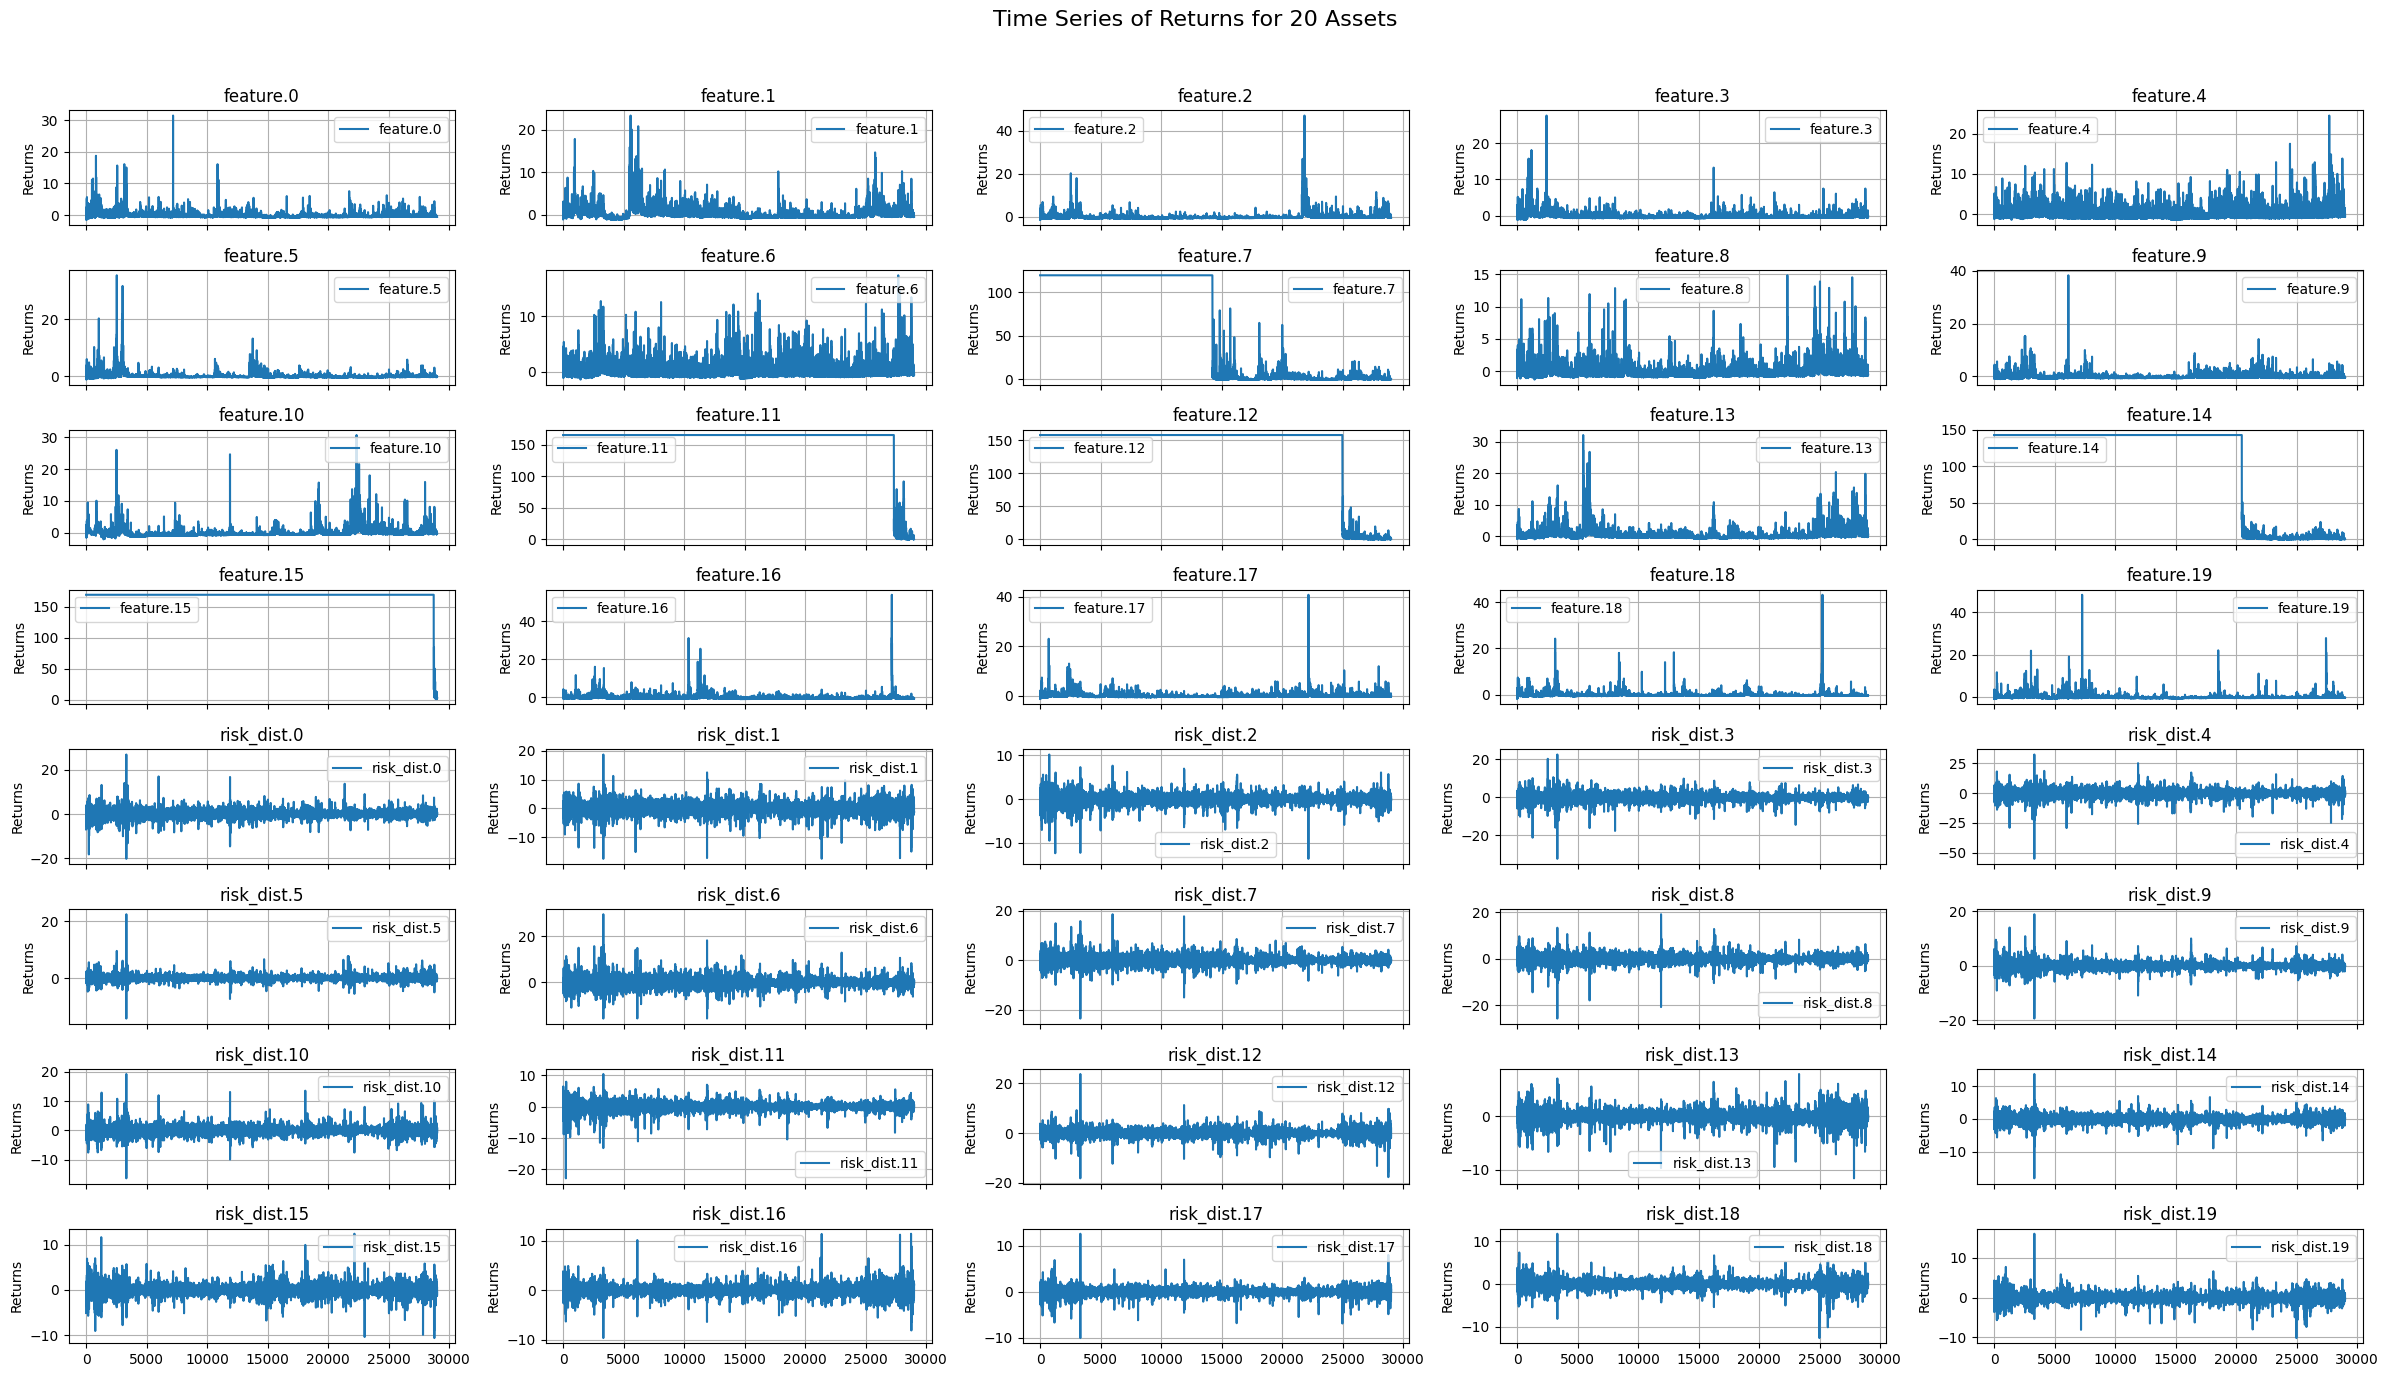

In [43]:
all_plots(features, rows=8, cols=5)

## Predictions: 

### Strategy 1- Conditional Modeling Approach (CMA)

In [45]:
df_cma = returns_2.join(features)
df_cma.columns

Index(['return.0', 'return.1', 'return.2', 'return.3', 'return.4', 'return.5',
       'return.6', 'return.7', 'return.8', 'return.9', 'return.10',
       'return.11', 'return.12', 'return.13', 'return.14', 'return.15',
       'return.16', 'return.17', 'return.18', 'return.19', 'feature.0',
       'feature.1', 'feature.2', 'feature.3', 'feature.4', 'feature.5',
       'feature.6', 'feature.7', 'feature.8', 'feature.9', 'feature.10',
       'feature.11', 'feature.12', 'feature.13', 'feature.14', 'feature.15',
       'feature.16', 'feature.17', 'feature.18', 'feature.19', 'risk_dist.0',
       'risk_dist.1', 'risk_dist.2', 'risk_dist.3', 'risk_dist.4',
       'risk_dist.5', 'risk_dist.6', 'risk_dist.7', 'risk_dist.8',
       'risk_dist.9', 'risk_dist.10', 'risk_dist.11', 'risk_dist.12',
       'risk_dist.13', 'risk_dist.14', 'risk_dist.15', 'risk_dist.16',
       'risk_dist.17', 'risk_dist.18', 'risk_dist.19', 'risk_level.0',
       'risk_level.1', 'risk_level.2', 'risk_level.3', 'risk_le

### Strategy 1: Train and predict each return.X using only features with the same .X suffix 

In [46]:
df_0 = df[[col for col in df.columns if col.endswith(".0")]]
df_0.head()

,return.0,risk_dist.0,risk_level.0
0,-6.939050,-6.929608,4
1,-1.876520,-1.867078,3
2,1.127755,1.137198,2
3,0.118527,0.127970,1
4,-1.646054,-1.636611,2


In [73]:
def model_selection_strategy(df, train_ratio=0.75, c_mom=0.1, c_rev=-0.25):
    """
    Apply different models based on risk levels to predict future returns,
    using features and risk_distance with the same suffix.

    Parameters:
    - df (pd.DataFrame): DataFrame containing returns, risk distances, and risk levels.
    - train_ratio (float): Percentage of data used for training (default: 0.75).
    - c_mom (float): Momentum model constant.
    - c_rev (float): Mean-reversion speed constant.

    Returns:
    - pd.DataFrame: Predicted returns for all return.X columns.
    """

    predicted_returns_dict = {}  # Store predictions for all return.X columns
    actual_returns_dict = {}
    risk_levels_dict = {}

    # Compute global standard deviation for all returns
    std_returns = df[[c for c in df.columns if "return" in c]].std()

    for col in [c for c in df.columns if "return" in c]:  # Iterate over return columns
        suffix = col.split(".")[-1]  # Extract suffix (0,1,2,...)
        risk_col = f"risk_level.{suffix}"  # Corresponding risk level column
        risk_dist_col = f"risk_dist.{suffix}"  # Corresponding risk distance column

        # Select feature columns dynamically
        feature_cols = [
            c for c in df.columns if c.endswith(f".{suffix}") and ("feature" in c)
        ]

        # 🚀 **Step 1: Train-Test Split (75% Train, 25% Test)**
        train_df, test_df = train_test_split(df, train_size=train_ratio, shuffle=False)

        # **Step 2: Train Regression Model Only Once**
        train_X = train_df[feature_cols]
        train_y = train_df[col]
        model = LinearRegression()
        model.fit(train_X, train_y)  # Train OLS model on 75% of data

        print(f"\n--- Model Summary for {col} (Risk Level = 1) ---")
        print("Intercept (α):", model.intercept_)
        print("Coefficients (β):", dict(zip(feature_cols, model.coef_)))
        print("R² Score on Training Data:", model.score(train_X, train_y))

        # Store predictions for this return.X column
        predicted_values = pd.Series(index=test_df.index, dtype="float64")

        for idx in test_df.index:  # Only predict on the test dataset
            risk_level = df.loc[idx, risk_col]  # Get risk level

            if risk_level == "1":  # Use pre-trained regression model
                X = pd.DataFrame(
                    df.loc[idx, feature_cols].values.reshape(1, -1),
                    columns=feature_cols,
                )
                predicted_values[idx] = model.predict(X)[0]  # Store predicted value

            elif risk_level == "2":  # Momentum model
                risk_distance = df.loc[idx, risk_dist_col]  # d_it
                sigma_t = std_returns[col]  # sigma_t (global std dev)
                predicted_values[idx] = (
                    df.loc[idx, col] * (risk_distance / sigma_t) * c_mom
                )

            elif risk_level == "3":  # Reversal model
                risk_distance = df.loc[idx, risk_dist_col]  # d_it
                sigma_t = std_returns[col]  # sigma_t (global std dev)
                predicted_values[idx] = (
                    df.loc[idx, col] * (risk_distance / sigma_t) * c_rev
                )

            elif risk_level == "4":  # Moving average model
                if (
                    idx >= 2
                ):  # Ensure we have at least 3 data points for rolling average
                    predicted_values[idx] = (
                        df.loc[idx - 2, col] + df.loc[idx - 1, col] + df.loc[idx, col]
                    ) / 3
                else:
                    predicted_values[idx] = df.loc[
                        idx, col
                    ]  # Default to current return if not enough data

        # Store results in dictionaries for later concatenation
        predicted_returns_dict[f"predicted_{col}"] = predicted_values
        actual_returns_dict[f"actual_{col}"] = df.loc[test_df.index, col]
        risk_levels_dict[f"risk_level_{col}"] = df.loc[test_df.index, risk_col]

    # 🚀 **Step 3: Store & Display Predictions & Risk Levels**
    results_df = pd.concat(
        [
            pd.DataFrame(predicted_returns_dict),
            pd.DataFrame(actual_returns_dict),
            pd.DataFrame(risk_levels_dict),
        ],
        axis=1,
    )

    return results_df


# Apply the optimized strategy
df_cma_predicted = model_selection_strategy(df_cma)

df_cma_predicted.head()


--- Model Summary for return.0 (Risk Level = 1) ---
Intercept (α): 0.0007434703514294545
Coefficients (β): {'feature.0': np.float64(0.07152082818952153)}
R² Score on Training Data: 0.002307373989687722

--- Model Summary for return.1 (Risk Level = 1) ---
Intercept (α): 0.018402704490106885
Coefficients (β): {'feature.1': np.float64(-0.026471036277104756)}
R² Score on Training Data: 0.0006710995315520885

--- Model Summary for return.2 (Risk Level = 1) ---
Intercept (α): -0.00022313918935587193
Coefficients (β): {'feature.2': np.float64(0.039545872974375375)}
R² Score on Training Data: 0.0014726149365145158

--- Model Summary for return.3 (Risk Level = 1) ---
Intercept (α): -0.016124131331314143
Coefficients (β): {'feature.3': np.float64(-0.11435382545619341)}
R² Score on Training Data: 0.003911767355072371

--- Model Summary for return.4 (Risk Level = 1) ---
Intercept (α): -0.011275601554122114
Coefficients (β): {'feature.4': np.float64(-0.2040897686926832)}
R² Score on Training Data:

,predicted_return.0,predicted_return.1,predicted_return.2,predicted_return.3,predicted_return.4,predicted_return.5,predicted_return.6,predicted_return.7,predicted_return.8,predicted_return.9,...,risk_level_return.10,risk_level_return.11,risk_level_return.12,risk_level_return.13,risk_level_return.14,risk_level_return.15,risk_level_return.16,risk_level_return.17,risk_level_return.18,risk_level_return.19
21750,0.048915,0.076273,0.080818,0.030505,0.124567,0.032465,-0.077078,0.007268,0.036544,0.103023,...,1,2,1,1,2,1,1,1,2,2
21751,0.064576,-1.690362,0.047788,0.169444,0.426531,-0.026158,0.129731,0.007131,0.050130,0.003510,...,1,2,2,2,2,3,3,2,2,3
21752,0.035201,0.088356,0.088452,0.005916,-0.128938,0.091306,0.033023,0.006971,0.020553,0.145581,...,2,1,2,2,2,1,1,2,1,1
21753,-0.004746,0.083330,0.045592,0.030067,0.092246,-0.032018,-0.073118,0.006977,0.055133,-0.008340,...,1,2,1,2,1,2,2,1,1,2
21754,0.067816,0.057478,0.089355,0.040236,0.090142,0.039989,0.058266,0.007039,0.056521,-0.010263,...,2,1,2,2,1,1,2,2,2,2


In [75]:
### Debug only
# df_cma_predicted[[col for col in df_cma_predicted.columns if col.endswith(".0")]]

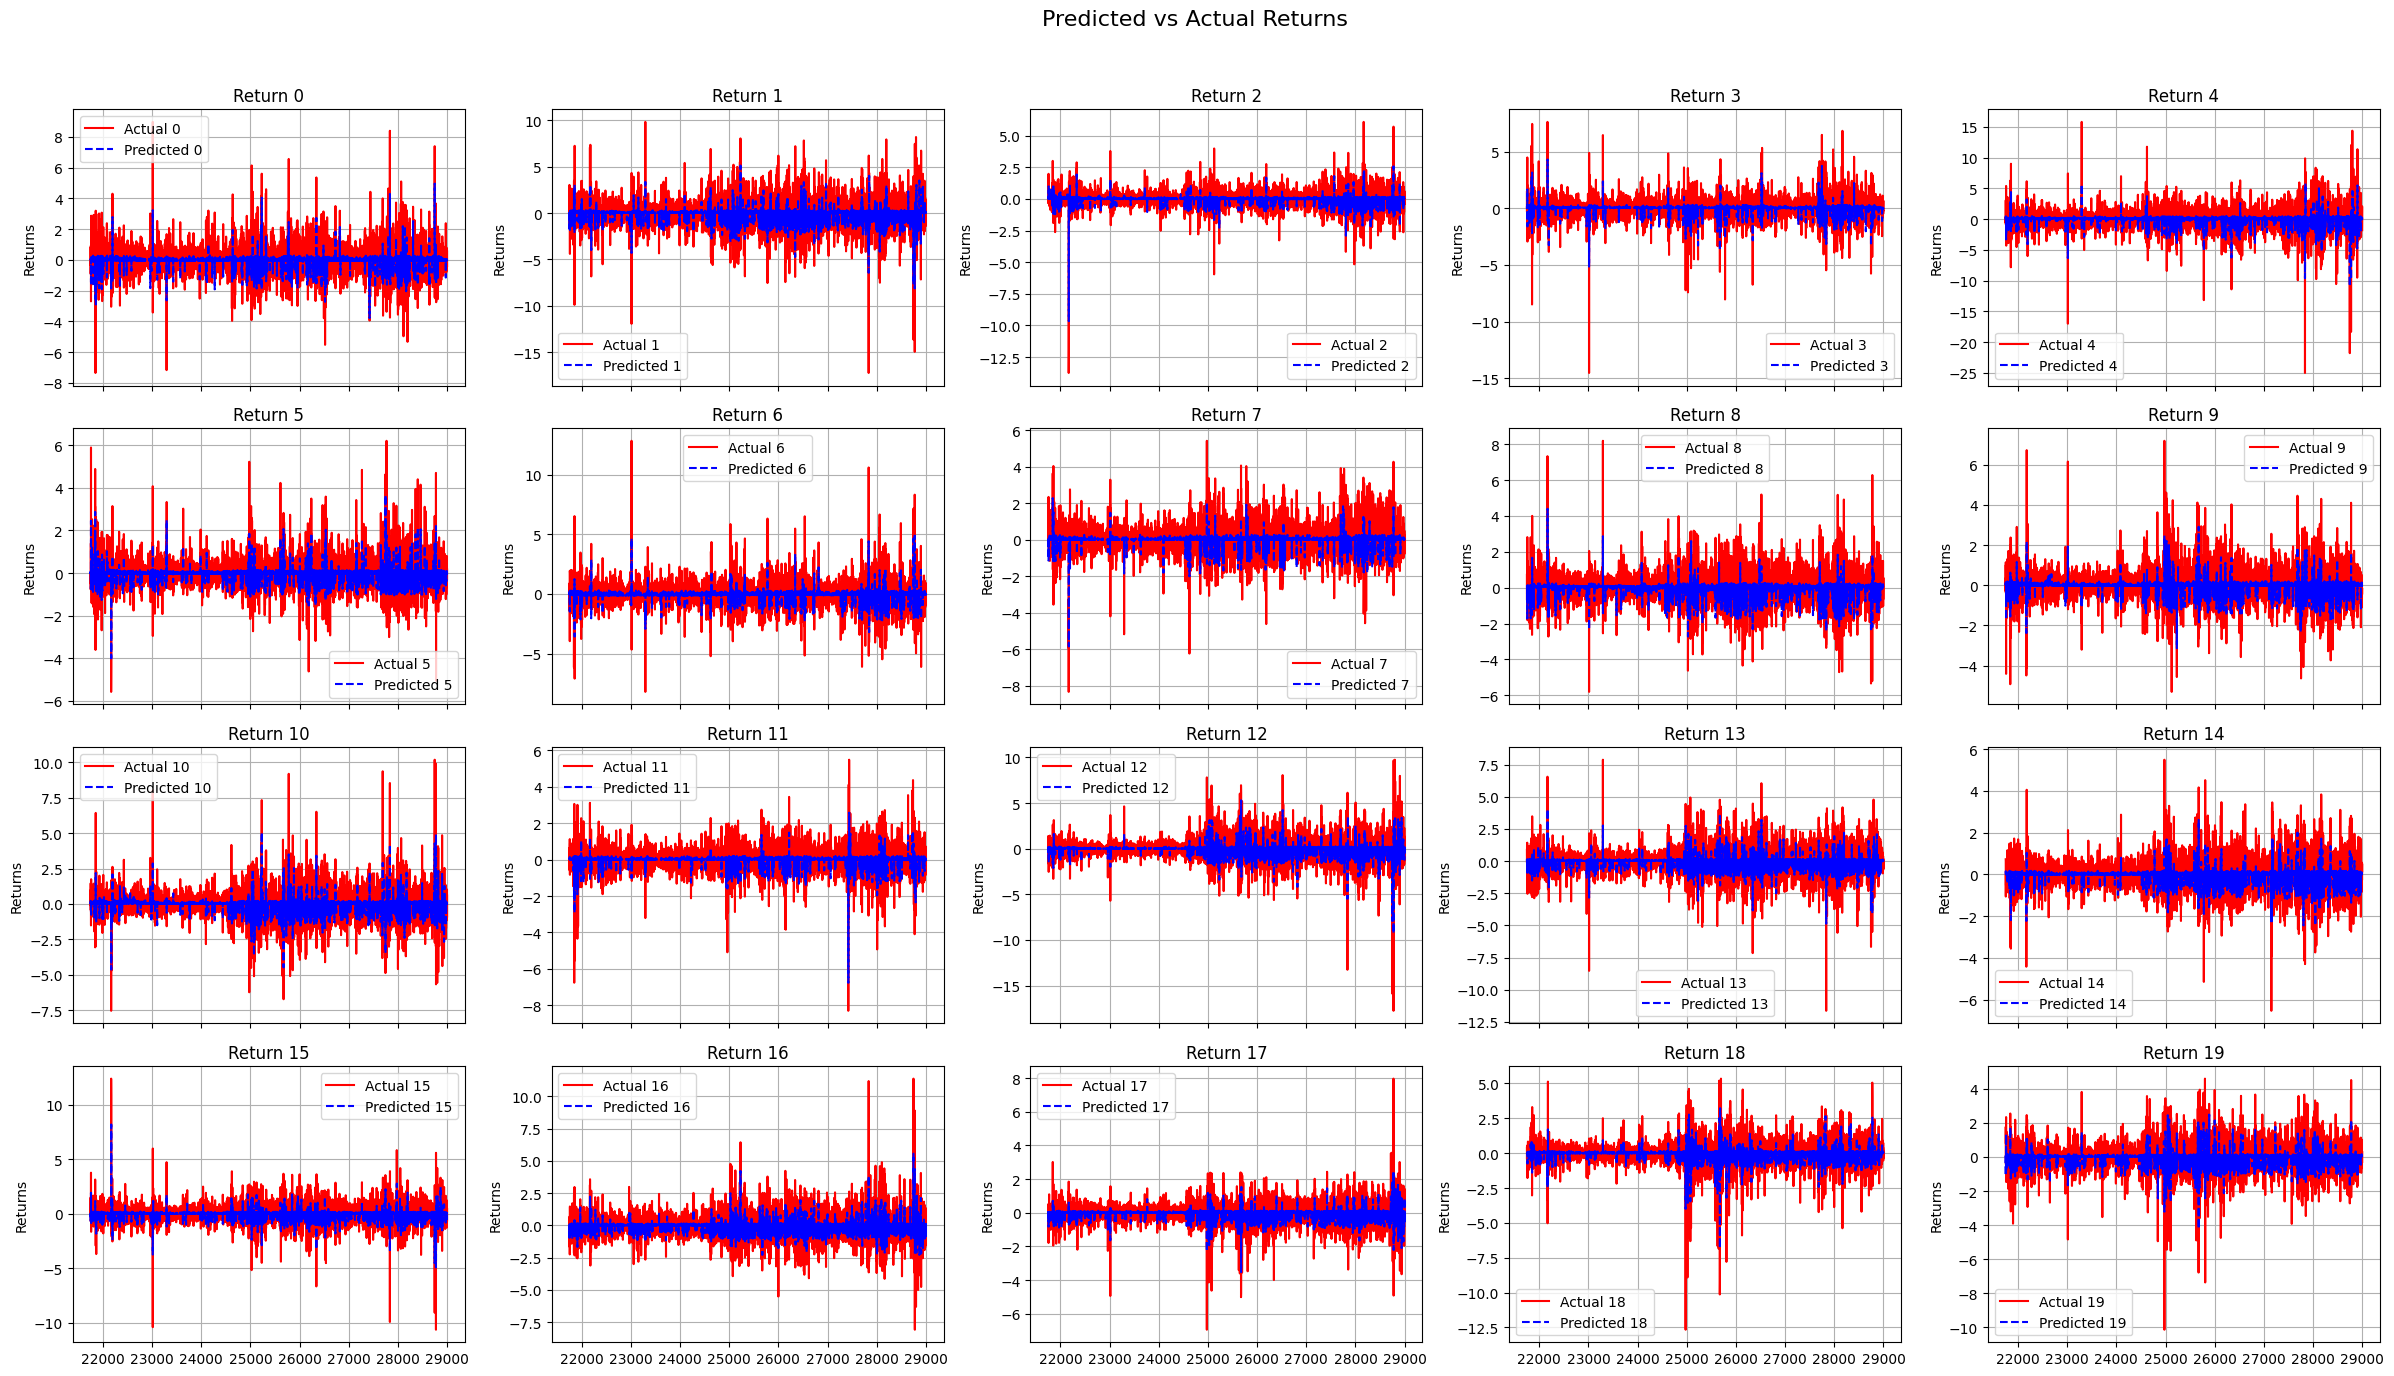

In [76]:
def plot_comparison(df, rows, cols):
    """
    Plot predicted vs. actual returns for multiple assets.
    """
    fig, axes = plt.subplots(rows, cols, figsize=(24, 14), sharex=True)
    fig.suptitle("Predicted vs Actual Returns", fontsize=16)

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    for i in range(rows * cols):
        col_suffix = f"{i}"  # Extract column suffix

        predicted_col = f"predicted_return.{col_suffix}"
        actual_col = f"actual_return.{col_suffix}"

        axes[i].plot(
            df.index, df[actual_col], label=f"Actual {col_suffix}", color="red"
        )
        axes[i].plot(
            df.index,
            df[predicted_col],
            label=f"Predicted {col_suffix}",
            color="blue",
            linestyle="--",
        )
        axes[i].set_title(f"Return {col_suffix}")
        axes[i].set_ylabel("Returns")
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Run the function with debugging
plot_comparison(df_cma_predicted, rows=4, cols=5)

### Compute MSE (validation on df_test)

MSE is a squared error metric, and if predictions & actual values are in percentages (e.g., 5% instead of 0.05), the squared differences will be 100 times larger than they should be.

In [77]:
def compute_mse(df):
    # Select only columns that start with 'predicted_return.' or 'actual_return.'
    cols_to_divide = [
        col
        for col in df.columns
        if col.startswith(("predicted_return.", "actual_return."))
    ]

    # Divide these columns by 100
    df[cols_to_divide] = df[cols_to_divide] / 100

    # Compute mse
    mse_results = {}
    for i in range(20):  # 20 return columns
        actual_col = f"actual_return.{i}"
        predicted_col = f"predicted_return.{i}"

        mse = mean_squared_error(df[actual_col], df[predicted_col])
        mse_results[f"Return {i}"] = mse

    # Convert to DataFrame for better visualization

    mse_df = pd.DataFrame(list(mse_results.items()), columns=["Return Series", "MSE"])

    return mse_df

In [78]:
# Apply the optimized strategy
mse_df = compute_mse(df_cma_predicted)
mse_df

,Return Series,MSE
0,Return 0,0.000079
1,Return 1,0.000185
2,Return 2,0.000039
3,Return 3,0.000069
4,Return 4,0.000253
5,Return 5,0.000038
6,Return 6,0.000080
7,Return 7,0.000055
8,Return 8,0.000067
9,Return 9,0.000049


### Prediction 2: CMA - All features

In [79]:
def model_selection_strategy_2(df, train_ratio=0.75, c_mom=0.1, c_rev=-0.25):
    """
    Apply different models based on risk levels to predict future returns,
    using ALL available features instead of just the ones matching the suffix.

    Parameters:
    - df (pd.DataFrame): DataFrame containing returns, risk distances, and risk levels.
    - train_ratio (float): Percentage of data used for training (default: 0.75).
    - c_mom (float): Momentum model constant.
    - c_rev (float): Mean-reversion speed constant.
    """

    predicted_returns_dict = {}  # Store predictions for all return.X columns
    actual_returns_dict = {}
    risk_levels_dict = {}

    # Compute global standard deviation for all returns
    std_returns = df[[c for c in df.columns if "return" in c]].std()

    # 🚀 Select ALL features (instead of just feature.suffix)
    all_feature_cols = [c for c in df.columns if "feature" in c]

    for col in [c for c in df.columns if "return" in c]:  # Iterate over return columns
        suffix = col.split(".")[-1]  # Extract suffix (0,1,2,...)
        risk_col = f"risk_level.{suffix}"  # Corresponding risk level column
        risk_dist_col = f"risk_dist.{suffix}"  # Corresponding risk distance column

        # 🚀 **Step 1: Train-Test Split (75% Train, 25% Test)**
        train_df, test_df = train_test_split(df, train_size=train_ratio, shuffle=False)

        # **Step 2: Train Regression Model Only Once**
        train_X = train_df[
            all_feature_cols
        ]  # Use ALL features, not just matching suffix
        train_y = train_df[col]
        model = LinearRegression()
        model.fit(train_X, train_y)  # Train OLS model on 75% of data

        print(f"\n--- Model Summary for {col} (Risk Level = 1) ---")
        print("Intercept (α):", model.intercept_)
        print("Coefficients (β):", dict(zip(all_feature_cols, model.coef_)))
        print("R² Score on Training Data:", model.score(train_X, train_y))

        # Store predictions for this return.X column
        predicted_values = pd.Series(index=test_df.index, dtype="float64")

        for idx in test_df.index:  # Only predict on the test dataset
            risk_level = df.loc[idx, risk_col]  # Get risk level

            if risk_level == "1":  # Use pre-trained regression model
                X = pd.DataFrame(
                    df.loc[idx, all_feature_cols].values.reshape(1, -1),
                    columns=all_feature_cols,
                )
                predicted_values[idx] = model.predict(X)[0]  # Store predicted value

            elif risk_level == "2":  # Momentum model
                risk_distance = df.loc[idx, risk_dist_col]  # d_it
                sigma_t = std_returns[col]  # sigma_t (global std dev)
                predicted_values[idx] = (
                    df.loc[idx, col] * (risk_distance / sigma_t) * c_mom
                )

            elif risk_level == "3":  # Reversal model
                risk_distance = df.loc[idx, risk_dist_col]  # d_it
                sigma_t = std_returns[col]  # sigma_t (global std dev)
                predicted_values[idx] = (
                    df.loc[idx, col] * (risk_distance / sigma_t) * c_rev
                )

            elif risk_level == "4":  # Moving average model
                if (
                    idx >= 2
                ):  # Ensure we have at least 3 data points for rolling average
                    predicted_values[idx] = (
                        df.loc[idx - 2, col] + df.loc[idx - 1, col] + df.loc[idx, col]
                    ) / 3
                else:
                    predicted_values[idx] = df.loc[
                        idx, col
                    ]  # Default to current return if not enough data

        # Store results in dictionaries for later concatenation
        predicted_returns_dict[f"predicted_{col}"] = predicted_values
        actual_returns_dict[f"actual_{col}"] = df.loc[test_df.index, col]
        risk_levels_dict[f"risk_level_{col}"] = df.loc[test_df.index, risk_col]

    # 🚀 **Step 3: Store & Display Predictions & Risk Levels**
    results_df = pd.concat(
        [
            pd.DataFrame(predicted_returns_dict),
            pd.DataFrame(actual_returns_dict),
            pd.DataFrame(risk_levels_dict),
        ],
        axis=1,
    )

    return results_df


# Apply the optimized strategy
df_cma_predicted_2 = model_selection_strategy_2(df_cma)

df_cma_predicted_2.head()


--- Model Summary for return.0 (Risk Level = 1) ---
Intercept (α): 0.07004038327869269
Coefficients (β): {'feature.0': np.float64(0.03414132284186887), 'feature.1': np.float64(-0.03579447870638904), 'feature.2': np.float64(-0.038487778225156435), 'feature.3': np.float64(0.08374665013457483), 'feature.4': np.float64(0.047748267584916376), 'feature.5': np.float64(-0.016337875466985778), 'feature.6': np.float64(-0.024047355637116068), 'feature.7': np.float64(-0.0006201329076887528), 'feature.8': np.float64(0.164049464351527), 'feature.9': np.float64(0.06928079776372442), 'feature.10': np.float64(-0.12214383682594207), 'feature.11': np.float64(2.0816681711418078e-17), 'feature.12': np.float64(1.1001859451730623e-27), 'feature.13': np.float64(-0.00025093102111775834), 'feature.14': np.float64(0.00011489842555498526), 'feature.15': np.float64(-1.3877787807814457e-17), 'feature.16': np.float64(0.0667394727291925), 'feature.17': np.float64(0.06939127191091266), 'feature.18': np.float64(-0.032

,predicted_return.0,predicted_return.1,predicted_return.2,predicted_return.3,predicted_return.4,predicted_return.5,predicted_return.6,predicted_return.7,predicted_return.8,predicted_return.9,...,risk_level_return.10,risk_level_return.11,risk_level_return.12,risk_level_return.13,risk_level_return.14,risk_level_return.15,risk_level_return.16,risk_level_return.17,risk_level_return.18,risk_level_return.19
21750,0.048915,0.076273,0.128498,-0.110039,0.001783,0.032465,-0.071477,0.167734,0.036544,0.103023,...,1,2,1,1,2,1,1,1,2,2
21751,0.064576,-1.690362,0.047788,0.169444,0.426531,0.275334,0.129731,0.246776,0.050130,-0.209885,...,1,2,2,2,2,3,3,2,2,3
21752,0.101177,0.088356,0.192331,-0.222298,-0.160890,0.091306,-0.024500,0.283511,-0.052255,0.145581,...,2,1,2,2,2,1,1,2,1,1
21753,-0.010875,0.083330,0.087630,-0.053143,0.038520,0.150653,-0.035632,0.091596,0.037014,-0.135819,...,1,2,1,2,1,2,2,1,1,2
21754,0.067816,0.057478,0.131760,0.040236,0.055770,0.039989,0.058266,0.175336,0.067104,-0.239510,...,2,1,2,2,1,1,2,2,2,2


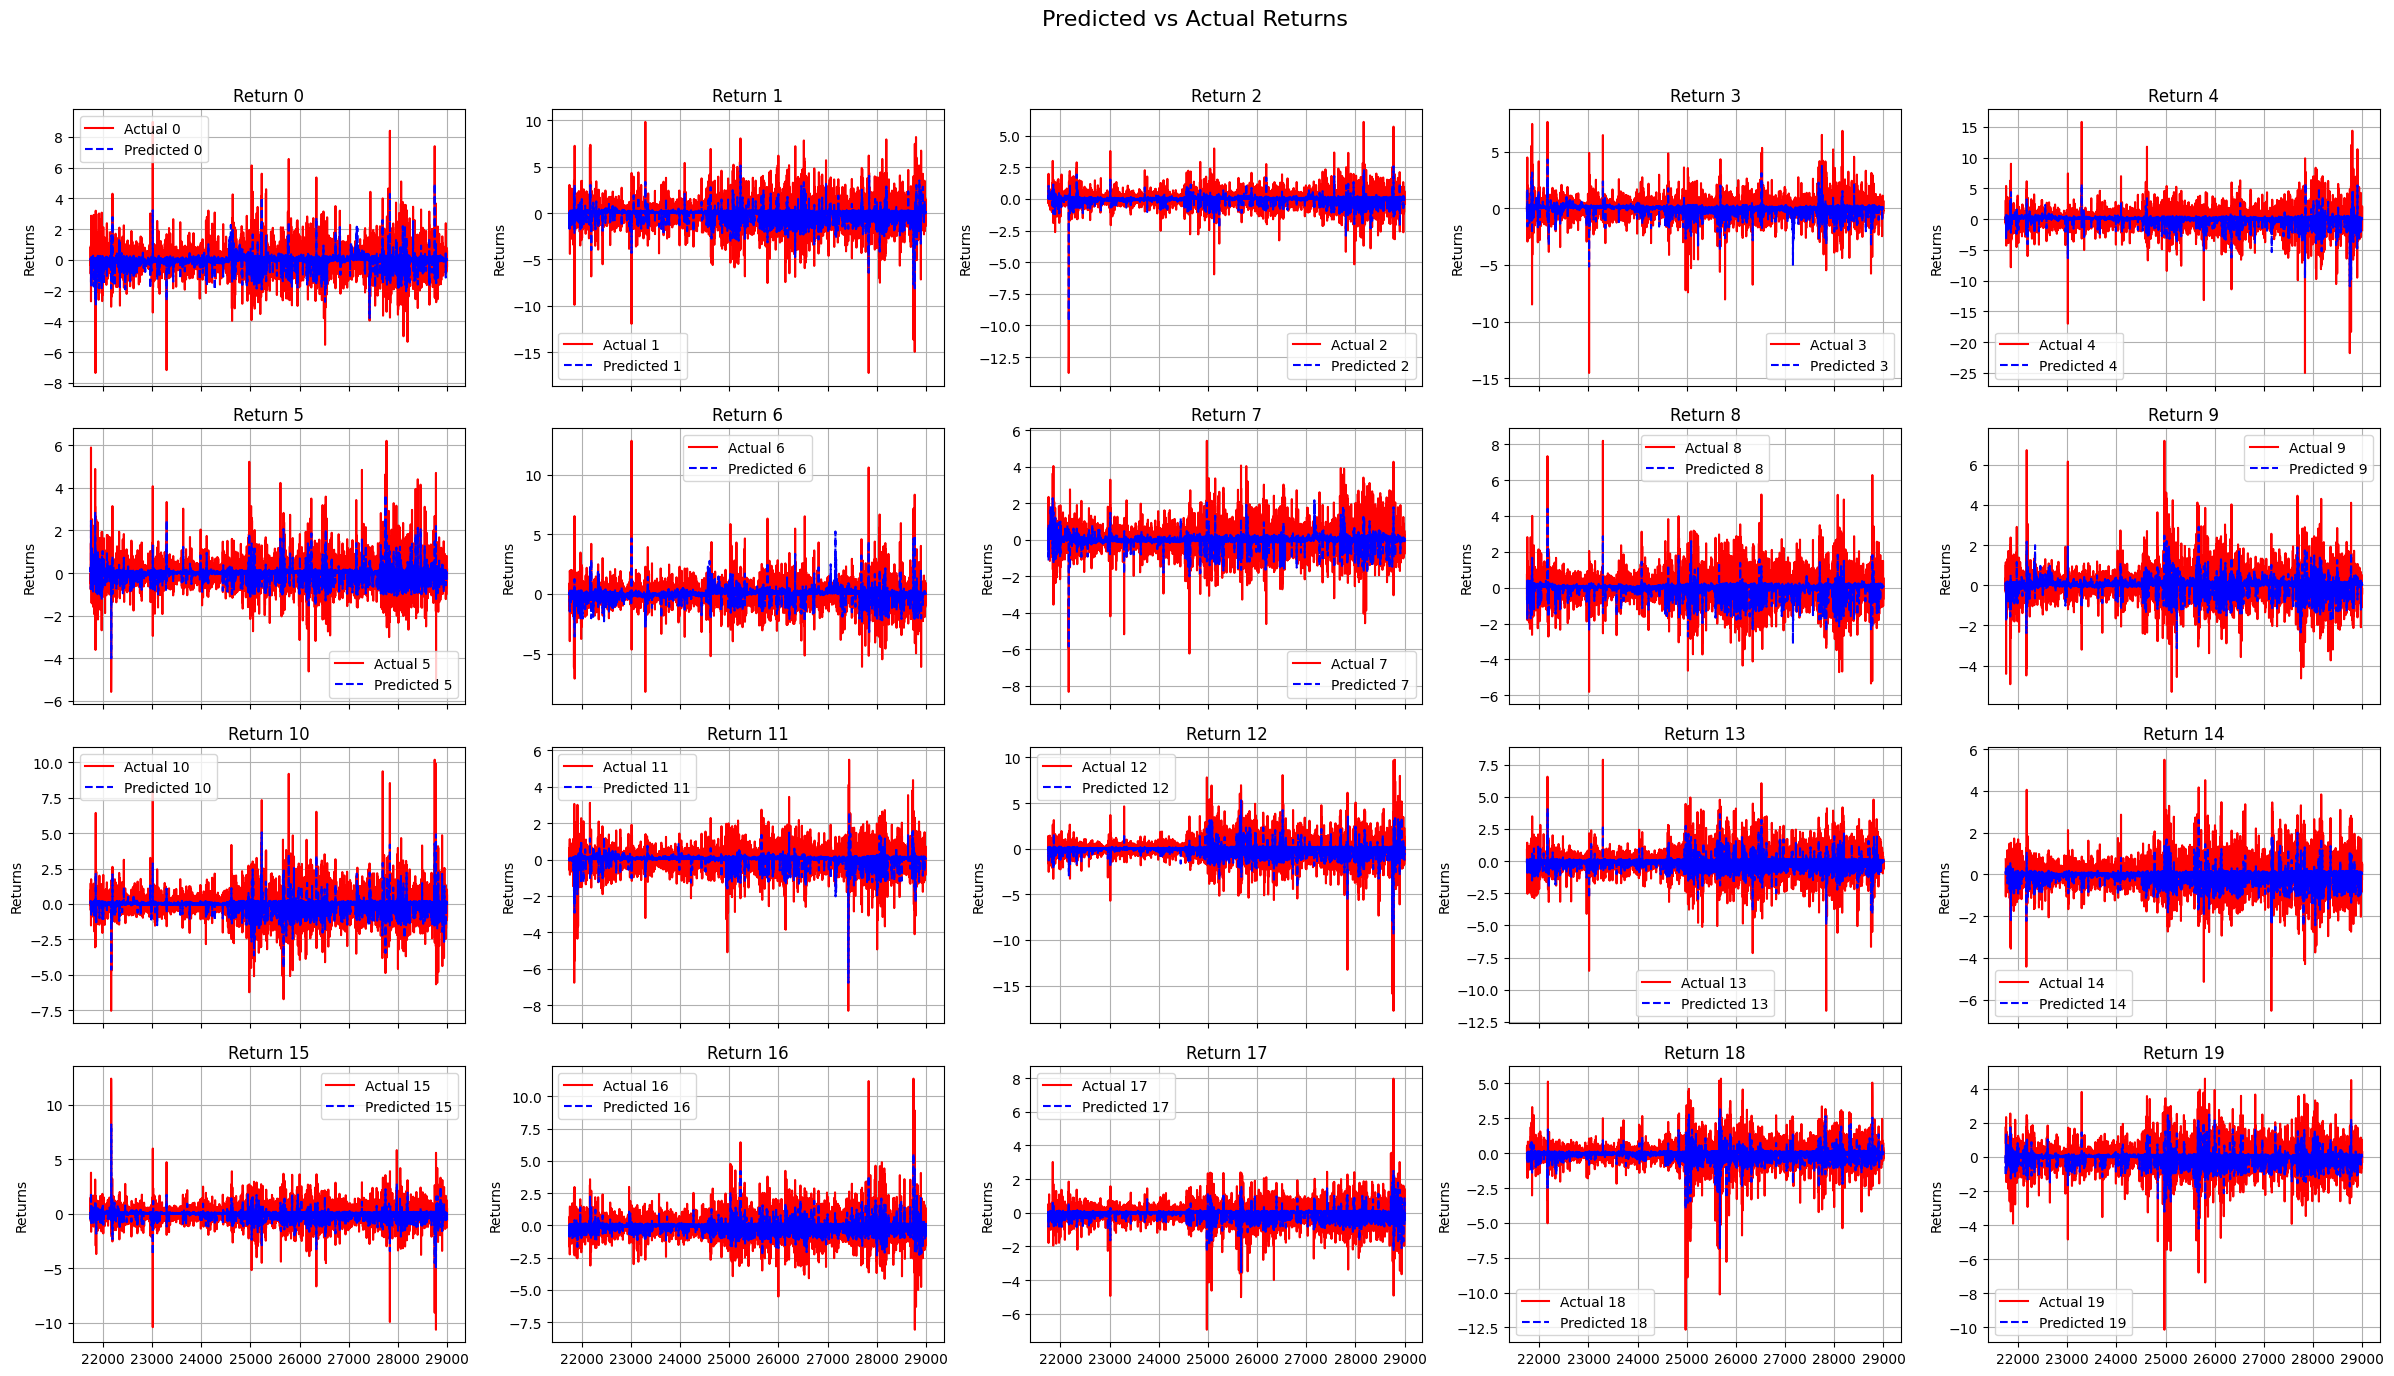

,Return Series,MSE
0,Return 0,0.000082
1,Return 1,0.000186
2,Return 2,0.000039
3,Return 3,0.000075
4,Return 4,0.000257
5,Return 5,0.000039
6,Return 6,0.000088
7,Return 7,0.000057
8,Return 8,0.000068
9,Return 9,0.000051


In [80]:
plot_comparison(df_cma_predicted_2, rows=4, cols=5)

mse_df_2 = compute_mse(df_cma_predicted_2)
mse_df_2

### Prediction 3: CMA - All features + lag (1) features

In [84]:
def add_lags(df, num_lags=2):
    """
    Generate lagged versions of all feature columns.
    """
    lagged_df = df.copy()
    feature_cols = [c for c in df.columns if "feature" in c]

    for lag in range(1, num_lags + 1):  # Create multiple lags if needed
        for col in feature_cols:
            lagged_df[f"{col}_lag{lag}"] = df[col].shift(lag)

    return lagged_df

In [ ]:
def model_selection_strategy_3(
    df, train_ratio=0.75, c_mom=0.1, c_rev=-0.25, num_lags=2
):
    """
    Apply different models based on risk levels to predict future returns,
    using ALL available features AND their lags.

    Parameters:
    - df (pd.DataFrame): DataFrame containing returns, risk distances, and risk levels.
    - train_ratio (float): Percentage of data used for training (default: 0.75).
    - c_mom (float): Momentum model constant.
    - c_rev (float): Mean-reversion speed constant.
    - num_lags (int): Number of lagged features to include.
    """

    # 🚀 **Step 1: Create Lagged Features**
    df = add_lags(df, num_lags=num_lags)

    predicted_returns_dict = {}  # Store predictions for all return.X columns
    actual_returns_dict = {}
    risk_levels_dict = {}

    # Compute global standard deviation for all returns
    std_returns = df[[c for c in df.columns if "return" in c]].std()

    # 🚀 Select ALL features (including lagged versions)
    all_feature_cols = [c for c in df.columns if "feature" in c or "_lag" in c]

    for col in [c for c in df.columns if "return" in c]:  # Iterate over return columns
        suffix = col.split(".")[-1]  # Extract suffix (0,1,2,...)
        risk_col = f"risk_level.{suffix}"  # Corresponding risk level column
        risk_dist_col = f"risk_dist.{suffix}"  # Corresponding risk distance column

        feature_cols = all_feature_cols  # Now using all feature columns

        # **Step 2: Train-Test Split (75% Train, 25% Test)**
        train_df, test_df = train_test_split(df, train_size=train_ratio, shuffle=False)

        # Remove NaNs introduced by lagging
        train_df = train_df.dropna()
        test_df = test_df.dropna()

        # **Step 3: Train Regression Model Only Once**
        train_X = train_df[feature_cols]
        train_y = train_df[col]
        model = LinearRegression()
        model.fit(train_X, train_y)  # Train OLS model on 75% of data

        print(f"\n--- Model Summary for {col} (Risk Level = 1) ---")
        print("Intercept (α):", model.intercept_)
        print("Coefficients (β):", dict(zip(feature_cols, model.coef_)))
        print("R² Score on Training Data:", model.score(train_X, train_y))

        # Store predictions for this return.X column
        predicted_values = pd.Series(index=test_df.index, dtype="float64")

        for idx in test_df.index:  # Only predict on the test dataset
            risk_level = df.loc[idx, risk_col]  # Get risk level

            if risk_level == "1":  # Use pre-trained regression model
                X = pd.DataFrame(
                    df.loc[idx, feature_cols].values.reshape(1, -1),
                    columns=feature_cols,
                )
                predicted_values[idx] = model.predict(X)[0]  # Store predicted value

            elif risk_level == "2":  # Momentum model
                risk_distance = df.loc[idx, risk_dist_col]  # d_it
                sigma_t = std_returns[col]  # sigma_t (global std dev)
                predicted_values[idx] = (
                    df.loc[idx, col] * (risk_distance / sigma_t) * c_mom
                )

            elif risk_level == "3":  # Reversal model
                risk_distance = df.loc[idx, risk_dist_col]  # d_it
                sigma_t = std_returns[col]  # sigma_t (global std dev)
                predicted_values[idx] = (
                    df.loc[idx, col] * (risk_distance / sigma_t) * c_rev
                )

            elif risk_level == "4":  # Moving average model
                if (
                    idx >= 2
                ):  # Ensure we have at least 3 data points for rolling average
                    predicted_values[idx] = (
                        df.loc[idx - 2, col] + df.loc[idx - 1, col] + df.loc[idx, col]
                    ) / 3
                else:
                    predicted_values[idx] = df.loc[
                        idx, col
                    ]  # Default to current return if not enough data

        # Store results in dictionaries for later concatenation
        predicted_returns_dict[f"predicted_{col}"] = predicted_values
        actual_returns_dict[f"actual_{col}"] = df.loc[test_df.index, col]
        risk_levels_dict[f"risk_level_{col}"] = df.loc[test_df.index, risk_col]

    # **Step 4: Store & Display Predictions & Risk Levels**
    results_df = pd.concat(
        [
            pd.DataFrame(predicted_returns_dict),
            pd.DataFrame(actual_returns_dict),
            pd.DataFrame(risk_levels_dict),
        ],
        axis=1,
    )

    return results_df


# Apply the optimized strategy
df_cma_predicted_3 = model_selection_strategy_3(df_cma, num_lags=2)

df_cma_predicted_3.head()

Index(['return.0', 'return.1', 'return.2', 'return.3', 'return.4', 'return.5',
       'return.6', 'return.7', 'return.8', 'return.9',
       ...
       'feature.10_lag2', 'feature.11_lag2', 'feature.12_lag2',
       'feature.13_lag2', 'feature.14_lag2', 'feature.15_lag2',
       'feature.16_lag2', 'feature.17_lag2', 'feature.18_lag2',
       'feature.19_lag2'],
      dtype='object', length=120)

--- Model Summary for return.0 (Risk Level = 1) ---
Intercept (α): 0.04756129602851266
Coefficients (β): {'feature.0': np.float64(0.07289140697731365), 'feature.1': np.float64(-0.11389280783086744), 'feature.2': np.float64(-0.014686090645141845), 'feature.3': np.float64(0.21583375907690042), 'feature.4': np.float64(0.08183131070834104), 'feature.5': np.float64(-0.031060458405884388), 'feature.6': np.float64(-0.09538021429228617), 'feature.7': np.float64(0.004657203125592785), 'feature.8': np.float64(0.32116696584835325), 'feature.9': np.float64(0.10677746318303294), 'feature.10': np.float64(-0.

,predicted_return.0,predicted_return.1,predicted_return.2,predicted_return.3,predicted_return.4,predicted_return.5,predicted_return.6,predicted_return.7,predicted_return.8,predicted_return.9,...,risk_level_return.10,risk_level_return.11,risk_level_return.12,risk_level_return.13,risk_level_return.14,risk_level_return.15,risk_level_return.16,risk_level_return.17,risk_level_return.18,risk_level_return.19
21750,0.048915,0.076273,0.061741,-0.174739,-0.206079,0.032465,0.080613,0.257524,0.036544,0.103023,...,1,2,1,1,2,1,1,1,2,2
21751,0.064576,-1.690362,0.047788,0.169444,0.426531,0.346228,0.129731,0.293398,0.050130,-0.114330,...,1,2,2,2,2,3,3,2,2,3
21752,0.084171,0.088356,0.056307,-0.081200,-0.102312,0.091306,-0.087779,0.177118,-0.041541,0.145581,...,2,1,2,2,2,1,1,2,1,1
21753,-0.195496,0.083330,-0.169706,0.128423,0.350673,-0.019797,-0.023013,-0.331717,0.296417,-0.017623,...,1,2,1,2,1,2,2,1,1,2
21754,0.067816,0.057478,0.114361,0.040236,-0.081153,0.039989,0.058266,0.278663,-0.006155,-0.250568,...,2,1,2,2,1,1,2,2,2,2


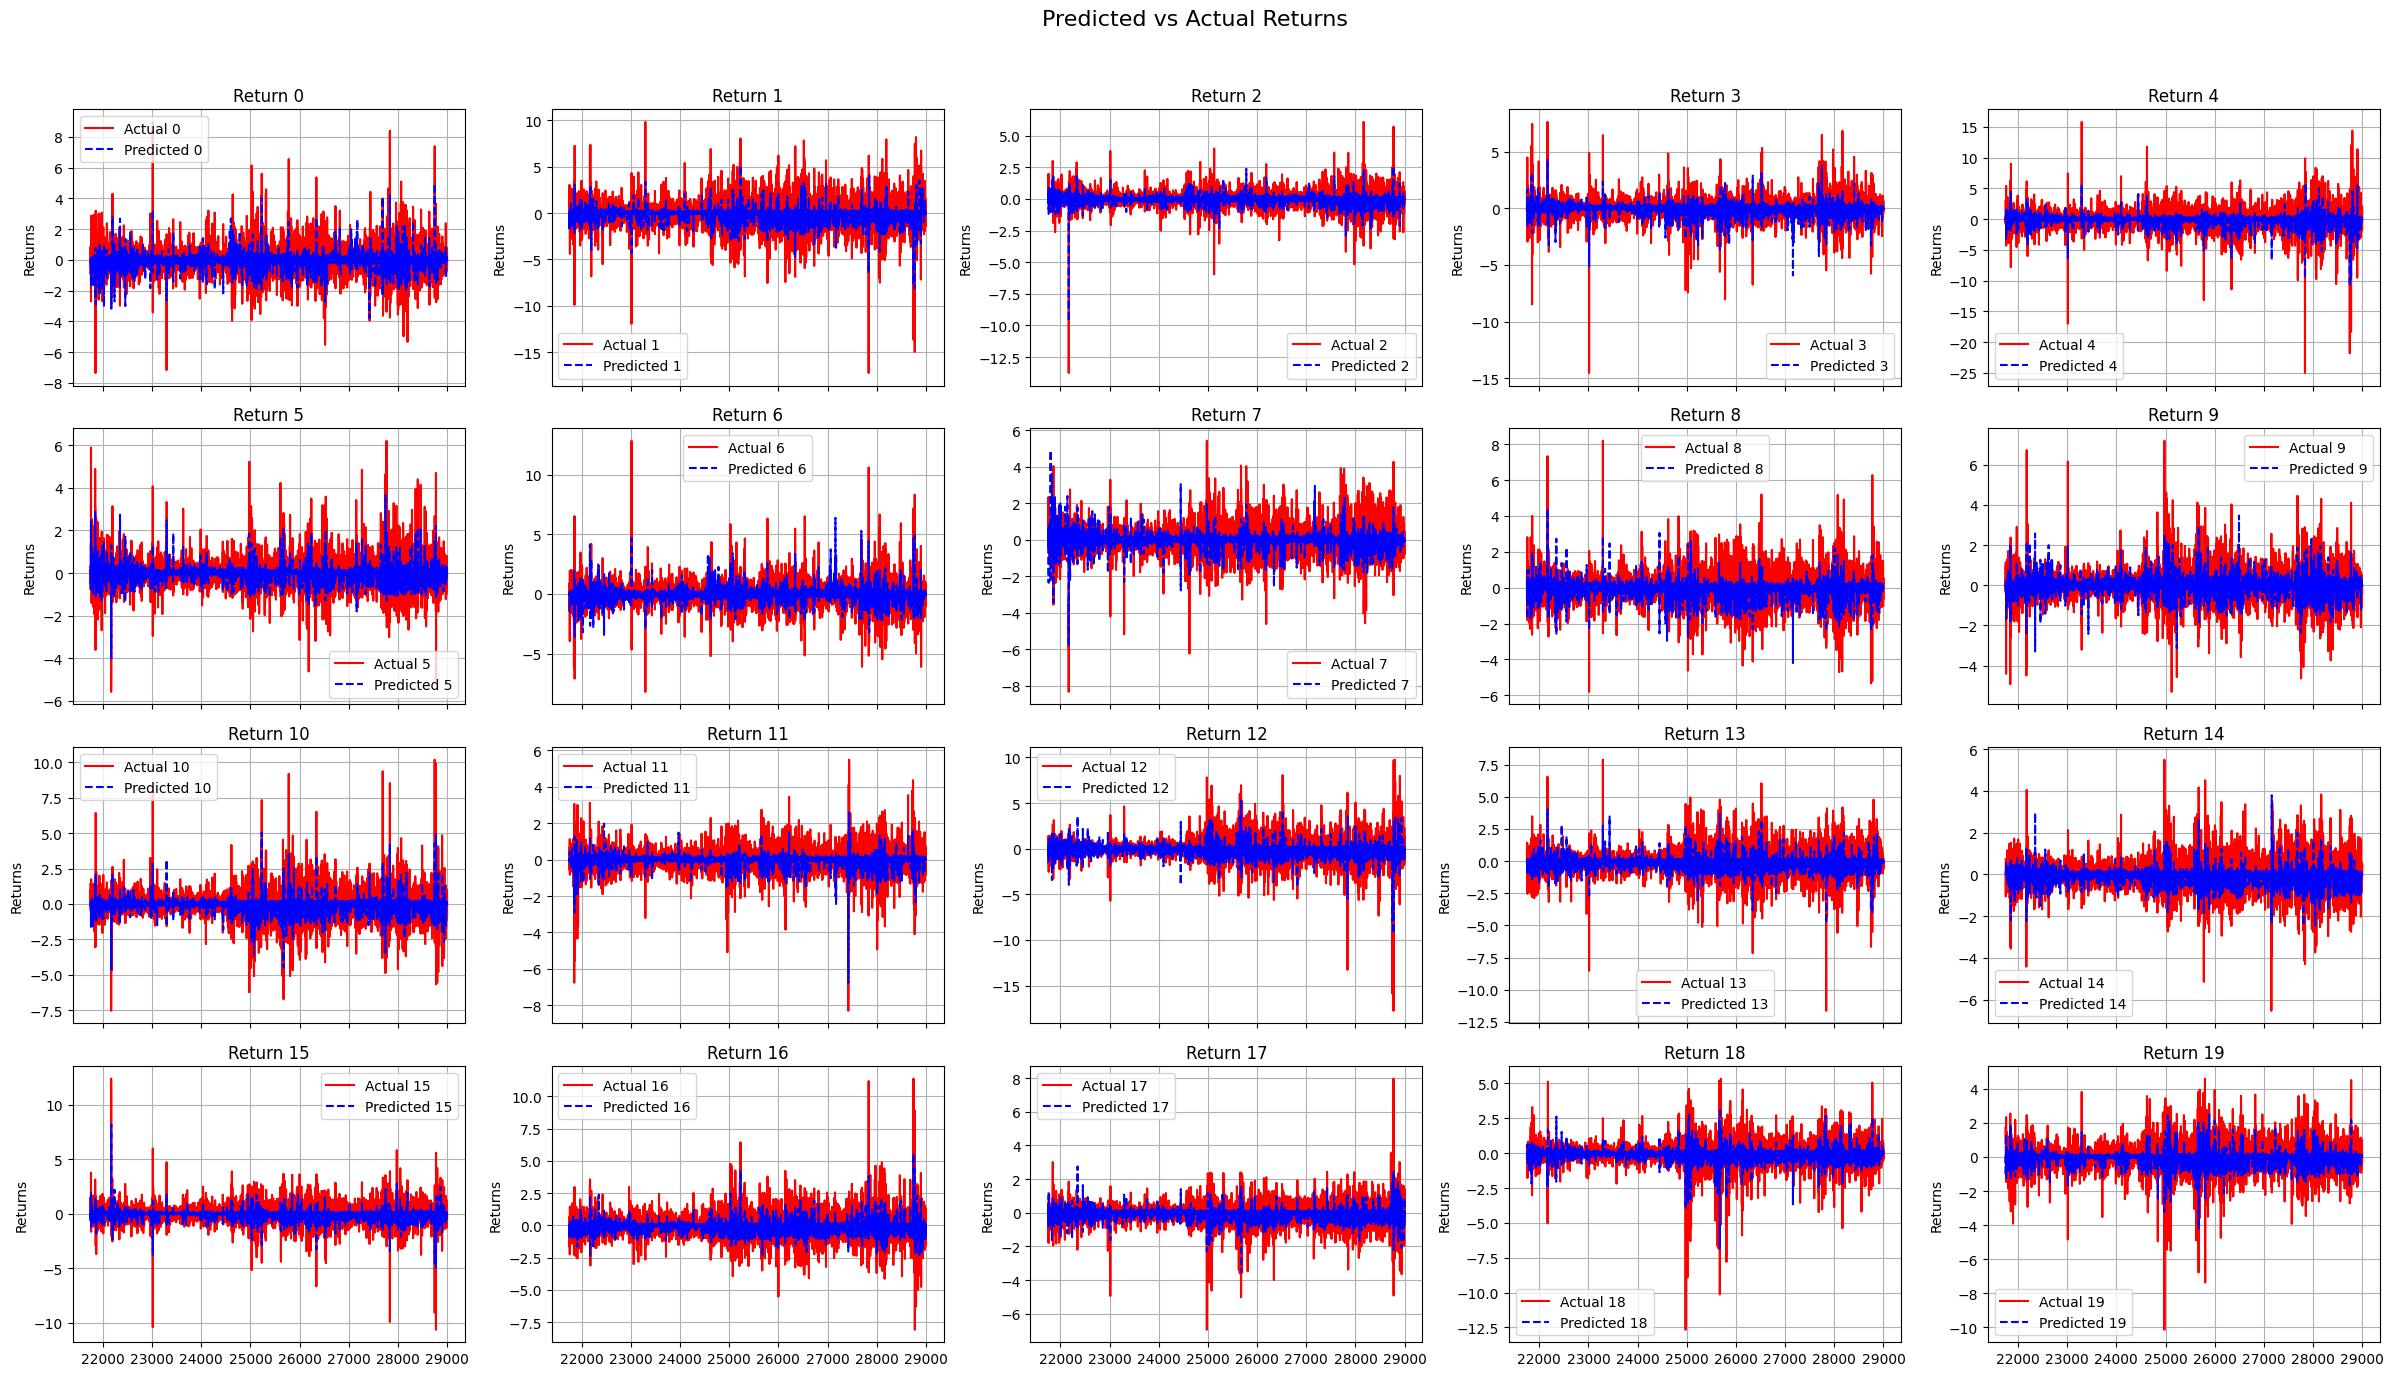

,Return Series,MSE
0,Return 0,0.000084
1,Return 1,0.000187
2,Return 2,0.000040
3,Return 3,0.000077
4,Return 4,0.000261
5,Return 5,0.000040
6,Return 6,0.000090
7,Return 7,0.000061
8,Return 8,0.000070
9,Return 9,0.000055


In [86]:
plot_comparison(df_cma_predicted_3, rows=4, cols=5)

mse_df_3 = compute_mse(df_cma_predicted_3)
mse_df_3

In [90]:
merged_mse_df = mse_df.merge(mse_df_2, on="Return Series", suffixes=("_1", "_2")).merge(
    mse_df_3, on="Return Series"
)

# Rename the final MSE column from mse_df_3
merged_mse_df.rename(columns={"MSE": "MSE_3"}, inplace=True)

In [91]:
merged_mse_df

,Return Series,MSE_1,MSE_2,MSE_3
0,Return 0,0.000079,0.000082,0.000084
1,Return 1,0.000185,0.000186,0.000187
2,Return 2,0.000039,0.000039,0.000040
3,Return 3,0.000069,0.000075,0.000077
4,Return 4,0.000253,0.000257,0.000261
5,Return 5,0.000038,0.000039,0.000040
6,Return 6,0.000080,0.000088,0.000090
7,Return 7,0.000055,0.000057,0.000061
8,Return 8,0.000067,0.000068,0.000070
9,Return 9,0.000049,0.000051,0.000055


# split into train and validate.  please use test_size=0.25 as indicated below

In [ ]:
test_size = 0.25
train_target, validate_target = train_test_split(
    target_returns, test_size=test_size, shuffle=False
)
train_returns, validate_returns = train_test_split(
    returns, test_size=test_size, shuffle=False
)
train_features, validate_features = train_test_split(
    features, test_size=test_size, shuffle=False
)

train_data = {"returns": train_returns, "features": train_features}

validate_data = {"returns": validate_returns, "features": validate_features}

## helper functions

In [ ]:
# note backtest funciton is not on target returns but on one step forward returns
def backtest(predictions, returns):
    predictions.ffill(inplace=True)
    # the following is closely relatived to measuring the lead lag correlation of the prediction to the outcome.
    pf_returns = (predictions.shift(1)).mul(returns.values).sum(axis=1)
    pf_returns.iloc[0] = (
        0  # first day return is 0, because we do not have prediction for time i=-1
    )
    return pf_returns


def returns_to_equity(returns):
    equity = returns.cumsum()
    return equity


def loss_mse(predictions, target):
    return mean_squared_error(target, predictions)

In [ ]:
from abc import ABC, abstractmethod
from typing import Any, Dict
import numpy as np
import pandas as pd
import math


def ClassByName(classname: str) -> Any:
    cls = globals()[classname]
    return cls()


def PredictorFactory(config: Dict[str, Any]) -> "Predictor":
    ind = ClassByName(config["type"])
    ind.set_parms(**config["parms"])
    return ind


class Predictor(ABC):

    @abstractmethod
    def set_parms(self, **parms: Any) -> None:
        pass

    @abstractmethod
    def train(self, data: pd.DataFrame, target: pd.Series) -> None:
        pass

    @abstractmethod
    def predict(self, data: pd.DataFrame) -> pd.DataFrame:
        pass


# specific example.  you need to make your own version of train, predict and, if needed add parameters
class LRegressionPredictor(Predictor):

    def __init__(self) -> None:
        self.model: LinearRegression = LinearRegression()

    def set_parms(self, **parms: Any) -> None:
        pass

    def train(self, data: pd.DataFrame, target: pd.Series) -> None:
        # Prepare the training data
        returns: pd.Series = data["returns"].fillna(0)

        target_array: np.ndarray = target.fillna(0).values
        X_train: np.ndarray = returns.values
        y_train: np.ndarray = target_array

        # Fit the model
        self.model.fit(X_train, y_train)

    def predict(self, data: pd.DataFrame) -> pd.DataFrame:
        returns: pd.Series = data["returns"].fillna(0)

        X_test: np.ndarray = returns.fillna(0).values

        # Make predictions
        predictions: np.ndarray = self.model.predict(X_test)

        # Normalize predictions
        predictions = predictions / np.sum(np.abs(predictions), axis=1, keepdims=True)

        # Create a DataFrame for predictions
        predictions_df: pd.DataFrame = pd.DataFrame(
            predictions, index=returns.index, columns=returns.columns
        )

        return predictions_df

# train

In [ ]:
predictor = LRegressionPredictor()
predictor.train(train_data, train_target)

In [ ]:
predictions = predictor.predict(train_data)

In [ ]:
msetrain = loss_mse(predictions, train_target)
print("training mse is {}".format(msetrain))

### train backtest

In [ ]:
returns_to_equity(backtest(predictions, train_data["returns"])).plot()

# VALIDATE

In [ ]:
predictions_validate = predictor.predict(validate_data)

In [ ]:
msevalidate = loss_mse(predictions_validate, validate_target)
print("validation mse is {}".format(msevalidate))

## validation backtest

In [ ]:
returns_to_equity(backtest(predictions_validate, validate_data["returns"])).plot()